In [1]:
import copy
import os
import time
import random
import sys
import warnings

import numpy as np
import pandas as pd
from typing import Any


from hyperimpute.plugins.imputers import Imputers
from hyperimpute.utils.distributions import enable_reproducible_results
from hyperimpute.utils.benchmarks import compare_models
import hyperimpute.logger as log


from IPython.display import HTML, display
import tabulate

import json

warnings.filterwarnings("ignore")
enable_reproducible_results()

imputers = Imputers()
log.add(sink=sys.stderr, level="INFO")

2022-01-24 18:13:02.754378: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-24 18:13:02.754399: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
from pathlib import Path

experiment = "experiments_01_hyperimpute_with_naive_search"


def get_imputer():
    return imputers.get("hyperimpute", optimizer="simple")


def save_results(fname, results):
    path = Path(experiment)
    path.mkdir(parents=True, exist_ok=True)

    out = path / fname

    with open(out, "w") as outfile:
        json.dump(results, outfile)


def evaluate_dataset_repeated(
    name,
    X_raw,
    y,
    ref_methods=["mean", "sklearn_ice", "sklearn_missforest", "softimpute", "gain"],
    scenarios=["MAR", "MCAR", "MNAR"],
    miss_pct=[0.1, 0.3, 0.5],
    n_iter=10,
):
    results = compare_models(
        name=name,
        evaluated_model=get_imputer(),
        X_raw=X_raw,
        ref_methods=ref_methods,
        scenarios=scenarios,
        miss_pct=miss_pct,
        n_iter=n_iter,
    )

    save_results(name, results)

## Sanity check in  debug mode

In [3]:
df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat",
    header=None,
    sep="\\t",
)

y = df[5]
X_raw = df.drop(columns=[5])

evaluate_dataset_repeated(
    "airfoil_debug",
    X_raw,
    y,
    scenarios=["MAR"],
    ref_methods=["mean", "ice"],
    n_iter=3,
    miss_pct=[0.3],
)

[2022-01-24T18:13:08.796456+0000][2109500][INFO] Iteration imputation: select_model_by_column: True, select_model_by_iteration: True
[2022-01-24T18:13:09.031881+0000][2109500][INFO]   > HyperImpute using inner optimization
[2022-01-24T18:13:09.032561+0000][2109500][INFO]   > Imputation iter 0
[2022-01-24T18:13:10.510841+0000][2109500][INFO]      >>> Column 1 <-- score -3.3941348855523285e-05 <-- Model xgboost_regressor
[2022-01-24T18:13:11.312499+0000][2109500][INFO]      >>> Column 0 <-- score -0.02464083144067871 <-- Model random_forest_regressor
[2022-01-24T18:13:11.930162+0000][2109500][INFO]      >>> Column 3 <-- score -0.014619624856791759 <-- Model xgboost_regressor
[2022-01-24T18:13:12.197193+0000][2109500][INFO]   > Imputation iter 1
[2022-01-24T18:13:12.764752+0000][2109500][INFO]      >>> Column 0 <-- score -0.02464083144067871 <-- Model random_forest_regressor
[2022-01-24T18:13:13.297849+0000][2109500][INFO]      >>> Column 1 <-- score -7.0961757996675694e-06 <-- Model xgbo

[2022-01-24T18:13:33.130726+0000][2109500][INFO]      >>> Column 2 <-- score -0.008631544537147894 <-- Model xgboost_regressor
[2022-01-24T18:13:33.968887+0000][2109500][INFO]      >>> Column 3 <-- score -0.014856955908115768 <-- Model xgboost_regressor
[2022-01-24T18:13:34.489992+0000][2109500][INFO]   > Imputation iter 1
[2022-01-24T18:13:35.039898+0000][2109500][INFO]      >>> Column 2 <-- score -0.00016719878891761347 <-- Model xgboost_regressor
[2022-01-24T18:13:35.819531+0000][2109500][INFO]      >>> Column 3 <-- score -0.012643018937202754 <-- Model xgboost_regressor
[2022-01-24T18:13:36.405853+0000][2109500][INFO]   > Imputation iter 2
[2022-01-24T18:13:37.023678+0000][2109500][INFO]      >>> Column 3 <-- score -0.011369764124372272 <-- Model xgboost_regressor
[2022-01-24T18:13:37.790522+0000][2109500][INFO]      >>> Column 1 <-- score -0.00015804537094265257 <-- Model xgboost_regressor
[2022-01-24T18:13:38.244337+0000][2109500][INFO]   > Imputation iter 3
[2022-01-24T18:13:38.

[2022-01-24T18:14:01.259123+0000][2109500][INFO]   > Imputation iter 4
[2022-01-24T18:14:01.792230+0000][2109500][INFO]      >>> Column 2 <-- score -0.00014286853568333036 <-- Model xgboost_regressor
[2022-01-24T18:14:02.655937+0000][2109500][INFO]      >>> Column 3 <-- score -0.014136635822259332 <-- Model xgboost_regressor
[2022-01-24T18:14:03.171452+0000][2109500][INFO]      >>>> Early stopping on objective diff iteration
[2022-01-24T18:14:03.174605+0000][2109500][INFO] benchmark hyperimpute took 9.897740840911865
[2022-01-24T18:14:03.181765+0000][2109500][INFO] benchmark mean took 0.005349159240722656
[2022-01-24T18:14:03.183086+0000][2109500][INFO] Iteration imputation: select_model_by_column: True, select_model_by_iteration: True
[2022-01-24T18:14:03.202898+0000][2109500][INFO]   > HyperImpute using inner optimization
[2022-01-24T18:14:03.203531+0000][2109500][INFO]   > Imputation iter 0
[2022-01-24T18:14:03.236089+0000][2109500][INFO]      >>> Column 1 <-- score -0.0200795268255

RMSE score


,Scenario,"miss_pct [0, 1]",Evaluated: hyperimpute,mean,ice
0,MAR,0.3,0.1297 +/- 0.0443,0.3238 +/- 0.03,0.2867 +/- 0.021




Wasserstein score


,Scenario,"miss_pct [0, 1]",Evaluated: hyperimpute,mean,ice
0,MAR,0.3,0.0207 +/- 0.0078,0.2482 +/- 0.0344,0.1389 +/- 0.0119


# Datasets

In [3]:
import hyperimpute.logger as log

log.remove()

| Dataset     | Length | Features |
|-------------|--------|----------|
| airfoil     | 1503   | 6        |
| blood       | 748    | 5        |
| bc          | 569    | 30       |
| california  | 20640  | 8        |
| climate     | 540    | 21       |
| compression | 1030   | 9        |
| slump       | 103    | 11       |
| sonar       | 208    | 61       |
| diabetes    | 442    | 10       |
| wine_red    | 1599   | 12       |
| wine_white  | 4898   | 12       |
| yeast       | 1484   | 10       |
| iris        | 150    | 4        |
| libras      | 360    | 91       |
| parkinsons  | 195    | 24       |
| yacht       | 308    | 7        |
| ionosphere  | 351    | 35       |
| letter      | 20000  | 17       |
| spam        | 4600   | 58       |
| credit      | 690    | 16       |

## Dataset: UCI Airfoil Self-Noise Data Set

https://archive.ics.uci.edu/ml/datasets/airfoil+self-noise


In [5]:
df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat",
    header=None,
    sep="\\t",
)

df

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [6]:
last_col = df.columns[-1]
y = df[last_col]
X_raw = df.drop(columns=[last_col])

evaluate_dataset_repeated("airfoil", X_raw, y)

benchmark took  2766.9197583198547
RMSE score


Scenario,"miss_pct [0, 1]",Our method,mean,sklearn_ice,sklearn_missforest,softimpute,gain
MAR,0.1,0.0908 +/- 0.0265,0.2988 +/- 0.0168,0.2596 +/- 0.0174,0.215 +/- 0.0204,0.444 +/- 0.0815,0.3184 +/- 0.0174
MAR,0.3,0.1417 +/- 0.0256,0.2836 +/- 0.0109,0.245 +/- 0.0191,0.2148 +/- 0.0321,0.431 +/- 0.0441,0.3056 +/- 0.0224
MAR,0.5,0.2057 +/- 0.039,0.302 +/- 0.0248,0.2704 +/- 0.0274,0.2425 +/- 0.0245,0.429 +/- 0.0494,0.3125 +/- 0.0314
MCAR,0.1,0.1305 +/- 0.007,0.2928 +/- 0.0022,0.2492 +/- 0.0014,0.2166 +/- 0.004,0.3679 +/- 0.0057,0.3051 +/- 0.0098
MCAR,0.3,0.202 +/- 0.005,0.2873 +/- 0.0026,0.2633 +/- 0.0033,0.2473 +/- 0.0054,0.3795 +/- 0.0037,0.2929 +/- 0.0055
MCAR,0.5,0.2687 +/- 0.0042,0.288 +/- 0.0015,0.2854 +/- 0.0015,0.2917 +/- 0.0046,0.4442 +/- 0.0066,0.3051 +/- 0.0115
MNAR,0.1,0.1311 +/- 0.0104,0.2827 +/- 0.0043,0.2407 +/- 0.0065,0.2024 +/- 0.0094,0.3945 +/- 0.023,0.2914 +/- 0.0114
MNAR,0.3,0.2114 +/- 0.0038,0.2938 +/- 0.005,0.2772 +/- 0.0094,0.2625 +/- 0.0059,0.4485 +/- 0.0121,0.2871 +/- 0.0059
MNAR,0.5,0.2765 +/- 0.008,0.2904 +/- 0.0026,0.3101 +/- 0.0077,0.2918 +/- 0.0089,0.433 +/- 0.0133,0.3172 +/- 0.0109




Wasserstein score


Scenario,"miss_pct [0, 1]",Our method,mean,sklearn_ice,sklearn_missforest,softimpute,gain
MAR,0.1,0.005 +/- 0.0018,0.0735 +/- 0.0058,0.0444 +/- 0.0042,0.0379 +/- 0.0062,0.0661 +/- 0.0145,0.0581 +/- 0.0086
MAR,0.3,0.0322 +/- 0.0053,0.2046 +/- 0.0121,0.1112 +/- 0.0163,0.098 +/- 0.0192,0.2034 +/- 0.0377,0.1554 +/- 0.0177
MAR,0.5,0.0599 +/- 0.0092,0.3713 +/- 0.0396,0.2025 +/- 0.025,0.1729 +/- 0.0281,0.3578 +/- 0.101,0.2513 +/- 0.0371
MCAR,0.1,0.0128 +/- 0.0011,0.1191 +/- 0.0016,0.0684 +/- 0.0013,0.0576 +/- 0.0011,0.0625 +/- 0.0014,0.0771 +/- 0.0052
MCAR,0.3,0.0516 +/- 0.0058,0.3487 +/- 0.0045,0.1814 +/- 0.0056,0.1553 +/- 0.0072,0.1736 +/- 0.0035,0.2224 +/- 0.0099
MCAR,0.5,0.1486 +/- 0.0076,0.5831 +/- 0.0036,0.3354 +/- 0.007,0.2934 +/- 0.0135,0.5983 +/- 0.1216,0.3887 +/- 0.016
MNAR,0.1,0.0113 +/- 0.0009,0.1131 +/- 0.0047,0.0629 +/- 0.0022,0.0543 +/- 0.0019,0.0809 +/- 0.0078,0.0854 +/- 0.0143
MNAR,0.3,0.0636 +/- 0.0084,0.3597 +/- 0.0076,0.1834 +/- 0.0068,0.1748 +/- 0.0112,0.3244 +/- 0.0734,0.22 +/- 0.0092
MNAR,0.5,0.1577 +/- 0.0142,0.591 +/- 0.0066,0.3461 +/- 0.0086,0.2998 +/- 0.0345,0.53 +/- 0.1125,0.3846 +/- 0.0274


## Dataset: Breast Cancer Wisconsin (Diagnostic)

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [7]:
from sklearn.datasets import load_breast_cancer

X_raw, y = load_breast_cancer(as_frame=True, return_X_y=True)

X_raw

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
evaluate_dataset_repeated("bc", X_raw, y)

benchmark took  4621.021433591843
RMSE score


Scenario,"miss_pct [0, 1]",Our method,mean,sklearn_ice,sklearn_missforest,softimpute,gain
MAR,0.1,0.059 +/- 0.0065,0.1735 +/- 0.0215,0.0577 +/- 0.0111,0.0867 +/- 0.0063,0.1304 +/- 0.0077,0.0926 +/- 0.0073
MAR,0.3,0.0567 +/- 0.003,0.1555 +/- 0.0094,0.0496 +/- 0.0032,0.0779 +/- 0.0038,0.1035 +/- 0.0031,0.0856 +/- 0.0042
MAR,0.5,0.0584 +/- 0.0021,0.1678 +/- 0.0116,0.0432 +/- 0.0042,0.0703 +/- 0.002,0.1 +/- 0.007,0.0775 +/- 0.0051
MCAR,0.1,0.0408 +/- 0.003,0.1447 +/- 0.0111,0.0393 +/- 0.0026,0.0622 +/- 0.0022,0.0918 +/- 0.0052,0.0664 +/- 0.0033
MCAR,0.3,0.0448 +/- 0.0028,0.1436 +/- 0.007,0.0469 +/- 0.0082,0.0653 +/- 0.0044,0.0901 +/- 0.0034,0.0642 +/- 0.0047
MCAR,0.5,0.0457 +/- 0.0018,0.1499 +/- 0.0066,0.0397 +/- 0.0028,0.0616 +/- 0.0043,0.0925 +/- 0.0045,0.0659 +/- 0.0025
MNAR,0.1,0.0467 +/- 0.0052,0.1708 +/- 0.0051,0.0457 +/- 0.0029,0.068 +/- 0.0065,0.0998 +/- 0.0104,0.0765 +/- 0.0076
MNAR,0.3,0.0534 +/- 0.0045,0.1659 +/- 0.0081,0.0612 +/- 0.0057,0.0752 +/- 0.0059,0.1089 +/- 0.0074,0.0837 +/- 0.0054
MNAR,0.5,0.0539 +/- 0.0046,0.1517 +/- 0.0037,0.0505 +/- 0.0062,0.073 +/- 0.0072,0.1031 +/- 0.0054,0.088 +/- 0.0069




Wasserstein score


Scenario,"miss_pct [0, 1]",Our method,mean,sklearn_ice,sklearn_missforest,softimpute,gain
MAR,0.1,0.0077 +/- 0.0008,0.0494 +/- 0.0074,0.0069 +/- 0.001,0.013 +/- 0.0015,0.0184 +/- 0.0029,0.0133 +/- 0.0025
MAR,0.3,0.019 +/- 0.0021,0.1279 +/- 0.0101,0.013 +/- 0.0012,0.0312 +/- 0.004,0.0448 +/- 0.0041,0.0344 +/- 0.0044
MAR,0.5,0.0327 +/- 0.004,0.2296 +/- 0.0256,0.015 +/- 0.003,0.0459 +/- 0.0035,0.0735 +/- 0.0111,0.0635 +/- 0.0154
MCAR,0.1,0.0118 +/- 0.0009,0.0891 +/- 0.0088,0.0095 +/- 0.0008,0.0184 +/- 0.0011,0.0304 +/- 0.0045,0.0219 +/- 0.001
MCAR,0.3,0.0323 +/- 0.0019,0.2542 +/- 0.012,0.0224 +/- 0.0024,0.0493 +/- 0.0049,0.0835 +/- 0.0043,0.0558 +/- 0.0066
MCAR,0.5,0.0572 +/- 0.0033,0.4348 +/- 0.0289,0.0316 +/- 0.0047,0.0818 +/- 0.0082,0.1346 +/- 0.0176,0.093 +/- 0.0069
MNAR,0.1,0.0131 +/- 0.0014,0.0976 +/- 0.0046,0.0107 +/- 0.001,0.0223 +/- 0.0019,0.0333 +/- 0.0035,0.025 +/- 0.0036
MNAR,0.3,0.0399 +/- 0.0038,0.2852 +/- 0.0166,0.0265 +/- 0.0023,0.063 +/- 0.008,0.1011 +/- 0.007,0.0797 +/- 0.0053
MNAR,0.5,0.0631 +/- 0.0052,0.4328 +/- 0.0076,0.0381 +/- 0.0077,0.0965 +/- 0.0123,0.1588 +/- 0.01,0.1573 +/- 0.0175


## Concrete Compressive Strength Data Set
https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength

In [11]:
df = pd.read_excel(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls"
)

df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [12]:
last_col = df.columns[-1]
y = df[last_col]
X_raw = df.drop(columns=[last_col])

evaluate_dataset_repeated("compression", X_raw, y)

benchmark took  3981.0887835025787
RMSE score


Scenario,"miss_pct [0, 1]",Our method,mean,sklearn_ice,sklearn_missforest,softimpute,gain
MAR,0.1,0.1083 +/- 0.0089,0.232 +/- 0.0136,0.1374 +/- 0.0139,0.1655 +/- 0.0106,0.2761 +/- 0.0211,0.2143 +/- 0.0104
MAR,0.3,0.104 +/- 0.011,0.218 +/- 0.0128,0.1361 +/- 0.0105,0.158 +/- 0.0116,0.2545 +/- 0.0172,0.2136 +/- 0.0173
MAR,0.5,0.1312 +/- 0.0028,0.2167 +/- 0.0126,0.1566 +/- 0.0117,0.1699 +/- 0.0067,0.2608 +/- 0.0229,0.2165 +/- 0.0177
MCAR,0.1,0.0984 +/- 0.0064,0.2246 +/- 0.0028,0.1348 +/- 0.0035,0.1529 +/- 0.0054,0.2549 +/- 0.0033,0.2195 +/- 0.0051
MCAR,0.3,0.1605 +/- 0.0016,0.225 +/- 0.002,0.1789 +/- 0.0027,0.1859 +/- 0.0022,0.2747 +/- 0.0035,0.2188 +/- 0.0031
MCAR,0.5,0.2006 +/- 0.0034,0.2252 +/- 0.0008,0.2074 +/- 0.0025,0.22 +/- 0.001,0.2983 +/- 0.003,0.234 +/- 0.0081
MNAR,0.1,0.0947 +/- 0.008,0.2219 +/- 0.0037,0.1353 +/- 0.0037,0.1513 +/- 0.0082,0.2567 +/- 0.0054,0.2075 +/- 0.0055
MNAR,0.3,0.1518 +/- 0.0066,0.226 +/- 0.0024,0.1822 +/- 0.0054,0.1825 +/- 0.0047,0.2862 +/- 0.0076,0.2231 +/- 0.0037
MNAR,0.5,0.2014 +/- 0.0032,0.2268 +/- 0.0018,0.211 +/- 0.0012,0.2224 +/- 0.0038,0.3114 +/- 0.0037,0.2719 +/- 0.0117




Wasserstein score


Scenario,"miss_pct [0, 1]",Our method,mean,sklearn_ice,sklearn_missforest,softimpute,gain
MAR,0.1,0.0092 +/- 0.0009,0.0774 +/- 0.0071,0.024 +/- 0.0031,0.0318 +/- 0.0024,0.0519 +/- 0.0049,0.0491 +/- 0.0046
MAR,0.3,0.0284 +/- 0.0029,0.2096 +/- 0.0144,0.0613 +/- 0.0113,0.0906 +/- 0.0063,0.1122 +/- 0.0129,0.1391 +/- 0.0252
MAR,0.5,0.0618 +/- 0.01,0.3556 +/- 0.0288,0.1112 +/- 0.0174,0.1387 +/- 0.009,0.1968 +/- 0.0199,0.2023 +/- 0.0142
MCAR,0.1,0.0153 +/- 0.0009,0.15 +/- 0.0031,0.0431 +/- 0.0021,0.0568 +/- 0.0022,0.0852 +/- 0.0034,0.1013 +/- 0.0058
MCAR,0.3,0.0575 +/- 0.0039,0.4408 +/- 0.0049,0.1666 +/- 0.0046,0.1715 +/- 0.0079,0.2081 +/- 0.0054,0.2808 +/- 0.0104
MCAR,0.5,0.2547 +/- 0.0664,0.7289 +/- 0.0026,0.4311 +/- 0.0164,0.294 +/- 0.0118,0.3287 +/- 0.0069,0.5109 +/- 0.0167
MNAR,0.1,0.014 +/- 0.0011,0.1437 +/- 0.0036,0.0424 +/- 0.0021,0.053 +/- 0.0033,0.0798 +/- 0.0045,0.0889 +/- 0.0054
MNAR,0.3,0.0701 +/- 0.0027,0.4446 +/- 0.0032,0.1698 +/- 0.0011,0.1834 +/- 0.0084,0.2331 +/- 0.0087,0.2641 +/- 0.009
MNAR,0.5,0.2548 +/- 0.0584,0.7359 +/- 0.0103,0.3813 +/- 0.0195,0.3289 +/- 0.0268,0.3303 +/- 0.0176,0.6527 +/- 0.0684


## Wine-Red dataset

In [13]:
# Wine Quality Data Set

df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",
    sep=";",
)

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [14]:
last_col = df.columns[-1]

y = df[last_col]
mapped_labels = sorted(y.unique())
mapping = {}
for idx, label in enumerate(mapped_labels):
    mapping[label] = idx
y = y.map(mapping)

X_raw = df.drop(columns=[last_col])

evaluate_dataset_repeated("wine_red", X_raw, y)

benchmark took  5944.194845676422
RMSE score


Scenario,"miss_pct [0, 1]",Our method,mean,sklearn_ice,sklearn_missforest,softimpute,gain
MAR,0.1,0.0947 +/- 0.0034,0.1545 +/- 0.0032,0.1036 +/- 0.0083,0.1137 +/- 0.0042,0.1502 +/- 0.0088,0.1372 +/- 0.0071
MAR,0.3,0.0842 +/- 0.0066,0.1359 +/- 0.0127,0.0947 +/- 0.0073,0.0984 +/- 0.0086,0.1241 +/- 0.009,0.1195 +/- 0.0116
MAR,0.5,0.0973 +/- 0.0066,0.1428 +/- 0.0089,0.1079 +/- 0.008,0.1111 +/- 0.008,0.1478 +/- 0.0155,0.1322 +/- 0.0068
MCAR,0.1,0.068 +/- 0.002,0.1269 +/- 0.0059,0.0814 +/- 0.0023,0.0867 +/- 0.0036,0.1207 +/- 0.0055,0.106 +/- 0.0032
MCAR,0.3,0.0914 +/- 0.003,0.1355 +/- 0.0041,0.1041 +/- 0.0038,0.104 +/- 0.0045,0.1339 +/- 0.0051,0.1168 +/- 0.004
MCAR,0.5,0.1103 +/- 0.0065,0.1342 +/- 0.0031,0.1255 +/- 0.0055,0.1156 +/- 0.0057,0.1326 +/- 0.0021,0.1338 +/- 0.0035
MNAR,0.1,0.0845 +/- 0.0037,0.1466 +/- 0.0079,0.096 +/- 0.0042,0.1036 +/- 0.0031,0.1377 +/- 0.0056,0.1232 +/- 0.0048
MNAR,0.3,0.0962 +/- 0.0023,0.1372 +/- 0.0058,0.113 +/- 0.0025,0.1095 +/- 0.004,0.1376 +/- 0.0078,0.1233 +/- 0.0043
MNAR,0.5,0.112 +/- 0.0043,0.1392 +/- 0.0021,0.1153 +/- 0.0034,0.1172 +/- 0.0028,0.1483 +/- 0.0035,0.1828 +/- 0.0148




Wasserstein score


Scenario,"miss_pct [0, 1]",Our method,mean,sklearn_ice,sklearn_missforest,softimpute,gain
MAR,0.1,0.0095 +/- 0.0006,0.0468 +/- 0.0021,0.0124 +/- 0.0006,0.0199 +/- 0.0006,0.0244 +/- 0.0021,0.0296 +/- 0.0031
MAR,0.3,0.0233 +/- 0.0028,0.1179 +/- 0.0144,0.0297 +/- 0.0038,0.0511 +/- 0.0052,0.0636 +/- 0.0092,0.0691 +/- 0.0118
MAR,0.5,0.0395 +/- 0.0087,0.2135 +/- 0.0225,0.0491 +/- 0.0034,0.0796 +/- 0.0084,0.1163 +/- 0.0134,0.1333 +/- 0.0153
MCAR,0.1,0.0119 +/- 0.0009,0.0729 +/- 0.0037,0.0193 +/- 0.0009,0.0276 +/- 0.0011,0.0369 +/- 0.0016,0.0367 +/- 0.0023
MCAR,0.3,0.0382 +/- 0.0028,0.2414 +/- 0.0086,0.0598 +/- 0.0024,0.0903 +/- 0.0055,0.1135 +/- 0.0055,0.1261 +/- 0.0074
MCAR,0.5,0.0765 +/- 0.008,0.399 +/- 0.0151,0.1427 +/- 0.011,0.1496 +/- 0.0105,0.2172 +/- 0.0213,0.2741 +/- 0.0149
MNAR,0.1,0.0156 +/- 0.0027,0.0859 +/- 0.0066,0.0222 +/- 0.001,0.0336 +/- 0.002,0.042 +/- 0.004,0.0452 +/- 0.0023
MNAR,0.3,0.0465 +/- 0.0033,0.2429 +/- 0.0155,0.063 +/- 0.0034,0.1016 +/- 0.0059,0.1255 +/- 0.007,0.1371 +/- 0.0092
MNAR,0.5,0.0751 +/- 0.0067,0.4004 +/- 0.01,0.1396 +/- 0.0214,0.1558 +/- 0.0076,0.1735 +/- 0.0035,0.4396 +/- 0.0568


## Wine-White dataset

In [15]:
df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",
    sep=";",
)

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [16]:
last_col = df.columns[-1]

y = df[last_col]
mapped_labels = sorted(y.unique())
mapping = {}
for idx, label in enumerate(mapped_labels):
    mapping[label] = idx
y = y.map(mapping)

X_raw = df.drop(columns=[last_col])

evaluate_dataset_repeated("wine_white", X_raw, y)

benchmark took  7899.529111146927
RMSE score


Scenario,"miss_pct [0, 1]",Our method,mean,sklearn_ice,sklearn_missforest,softimpute,gain
MAR,0.1,0.0627 +/- 0.0097,0.1154 +/- 0.0188,0.0825 +/- 0.0158,0.0813 +/- 0.0124,0.1137 +/- 0.0207,0.0987 +/- 0.0174
MAR,0.3,0.0624 +/- 0.0042,0.0973 +/- 0.01,0.0669 +/- 0.0042,0.0729 +/- 0.0044,0.097 +/- 0.0094,0.0872 +/- 0.0071
MAR,0.5,0.082 +/- 0.0053,0.1115 +/- 0.013,0.0879 +/- 0.0063,0.0939 +/- 0.0071,0.1185 +/- 0.0161,0.1182 +/- 0.0141
MCAR,0.1,0.0647 +/- 0.0051,0.109 +/- 0.0032,0.073 +/- 0.0041,0.0807 +/- 0.004,0.1119 +/- 0.0038,0.108 +/- 0.0071
MCAR,0.3,0.0758 +/- 0.0031,0.1047 +/- 0.0072,0.0885 +/- 0.0033,0.0876 +/- 0.0038,0.1122 +/- 0.0097,0.1001 +/- 0.0062
MCAR,0.5,0.0918 +/- 0.0023,0.1075 +/- 0.0034,0.0962 +/- 0.0026,0.0986 +/- 0.0022,0.1197 +/- 0.0054,0.119 +/- 0.0072
MNAR,0.1,0.0698 +/- 0.0066,0.1109 +/- 0.0042,0.0813 +/- 0.0051,0.0854 +/- 0.0054,0.115 +/- 0.0054,0.1045 +/- 0.0058
MNAR,0.3,0.0815 +/- 0.004,0.1075 +/- 0.0072,0.0885 +/- 0.0038,0.0903 +/- 0.0047,0.1134 +/- 0.0095,0.1097 +/- 0.0091
MNAR,0.5,0.092 +/- 0.0006,0.1083 +/- 0.0045,0.099 +/- 0.0025,0.0984 +/- 0.0007,0.1224 +/- 0.0082,0.1397 +/- 0.015




Wasserstein score


Scenario,"miss_pct [0, 1]",Our method,mean,sklearn_ice,sklearn_missforest,softimpute,gain
MAR,0.1,0.0065 +/- 0.0026,0.034 +/- 0.0059,0.008 +/- 0.0026,0.0136 +/- 0.0038,0.014 +/- 0.0036,0.0197 +/- 0.006
MAR,0.3,0.0192 +/- 0.0045,0.0809 +/- 0.0082,0.0189 +/- 0.0026,0.0322 +/- 0.003,0.0343 +/- 0.0055,0.0478 +/- 0.0051
MAR,0.5,0.0361 +/- 0.0026,0.1639 +/- 0.0199,0.0539 +/- 0.005,0.0684 +/- 0.0064,0.0841 +/- 0.0093,0.1215 +/- 0.0231
MCAR,0.1,0.0153 +/- 0.0029,0.0616 +/- 0.0019,0.0186 +/- 0.0015,0.0263 +/- 0.0019,0.029 +/- 0.0017,0.0477 +/- 0.0045
MCAR,0.3,0.0359 +/- 0.0015,0.1843 +/- 0.0118,0.0566 +/- 0.0038,0.08 +/- 0.0035,0.0871 +/- 0.0045,0.116 +/- 0.0084
MCAR,0.5,0.0598 +/- 0.0028,0.3084 +/- 0.0116,0.1223 +/- 0.0075,0.1296 +/- 0.0051,0.1485 +/- 0.0073,0.2231 +/- 0.0168
MNAR,0.1,0.016 +/- 0.0041,0.0628 +/- 0.003,0.0206 +/- 0.0017,0.0296 +/- 0.0028,0.0301 +/- 0.0019,0.0427 +/- 0.0026
MNAR,0.3,0.0472 +/- 0.0078,0.1887 +/- 0.0135,0.0574 +/- 0.0044,0.0822 +/- 0.0063,0.0892 +/- 0.0045,0.1351 +/- 0.0151
MNAR,0.5,0.0752 +/- 0.007,0.3093 +/- 0.015,0.1101 +/- 0.0037,0.1253 +/- 0.0054,0.1536 +/- 0.0077,0.3312 +/- 0.0555


## Yeast Data Set


In [17]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.data",
    sep="\s+",
    header=None,
)

df = df.drop(columns=[0])

for col in [9]:
    df[col] = LabelEncoder().fit_transform(df[col])

df

,1,2,3,4,5,6,7,8,9
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,6
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,6
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,6
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,7
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,6
...,...,...,...,...,...,...,...,...,...
1479,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,4
1480,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,7
1481,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,4
1482,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,7


In [18]:
last_col = df.columns[-1]
y = df[last_col]
X_raw = df.drop(columns=[last_col])

evaluate_dataset_repeated("yeast", X_raw, y)

benchmark took  4237.803042411804
RMSE score


Scenario,"miss_pct [0, 1]",Our method,mean,sklearn_ice,sklearn_missforest,softimpute,gain
MAR,0.1,0.1657 +/- 0.0798,0.1198 +/- 0.0092,0.1048 +/- 0.0067,0.1059 +/- 0.0065,0.1343 +/- 0.0116,0.1218 +/- 0.0053
MAR,0.3,0.1523 +/- 0.0506,0.1288 +/- 0.0034,0.113 +/- 0.0037,0.1158 +/- 0.0036,0.1321 +/- 0.0149,0.1299 +/- 0.0042
MAR,0.5,0.1204 +/- 0.0125,0.1184 +/- 0.0102,0.1182 +/- 0.0099,0.1382 +/- 0.0117,0.1317 +/- 0.0115,0.1235 +/- 0.0112
MCAR,0.1,0.1492 +/- 0.0373,0.1121 +/- 0.0024,0.103 +/- 0.0026,0.1038 +/- 0.0024,0.1191 +/- 0.0016,0.1112 +/- 0.0034
MCAR,0.3,0.1808 +/- 0.0544,0.1148 +/- 0.0016,0.1085 +/- 0.0012,0.1213 +/- 0.0055,0.1369 +/- 0.0013,0.117 +/- 0.0012
MCAR,0.5,0.1686 +/- 0.0298,0.1173 +/- 0.0007,0.1464 +/- 0.0061,0.1339 +/- 0.0058,0.1676 +/- 0.0006,0.1482 +/- 0.0089
MNAR,0.1,0.14 +/- 0.0382,0.1184 +/- 0.0042,0.1982 +/- 0.0962,0.1105 +/- 0.0052,0.1255 +/- 0.0032,0.1152 +/- 0.0029
MNAR,0.3,0.1159 +/- 0.0029,0.1197 +/- 0.0024,0.6046 +/- 0.2791,0.1317 +/- 0.0056,0.1524 +/- 0.0023,0.1302 +/- 0.0058
MNAR,0.5,0.1764 +/- 0.0559,0.1185 +/- 0.0015,0.2898 +/- 0.0227,0.1405 +/- 0.0073,0.1795 +/- 0.0019,0.1883 +/- 0.0286




Wasserstein score


Scenario,"miss_pct [0, 1]",Our method,mean,sklearn_ice,sklearn_missforest,softimpute,gain
MAR,0.1,0.0294 +/- 0.0167,0.0282 +/- 0.002,0.0164 +/- 0.0011,0.0176 +/- 0.0005,0.0137 +/- 0.0012,0.0214 +/- 0.0008
MAR,0.3,0.0684 +/- 0.0232,0.0974 +/- 0.0087,0.0619 +/- 0.0066,0.0606 +/- 0.0057,0.0579 +/- 0.0071,0.0793 +/- 0.0037
MAR,0.5,0.0696 +/- 0.0047,0.1576 +/- 0.0285,0.084 +/- 0.0105,0.104 +/- 0.0057,0.0927 +/- 0.0155,0.1248 +/- 0.0271
MCAR,0.1,0.0474 +/- 0.009,0.0569 +/- 0.0013,0.0366 +/- 0.001,0.0384 +/- 0.0012,0.0343 +/- 0.0012,0.0457 +/- 0.0036
MCAR,0.3,0.14 +/- 0.055,0.1725 +/- 0.0022,0.1035 +/- 0.0026,0.1068 +/- 0.0059,0.1058 +/- 0.0027,0.1247 +/- 0.0032
MCAR,0.5,0.1425 +/- 0.0497,0.2921 +/- 0.002,0.1786 +/- 0.0079,0.1504 +/- 0.0063,0.2292 +/- 0.0077,0.306 +/- 0.0244
MNAR,0.1,0.0434 +/- 0.0101,0.0583 +/- 0.0016,0.0455 +/- 0.0095,0.0377 +/- 0.0016,0.0335 +/- 0.0015,0.044 +/- 0.002
MNAR,0.3,0.0821 +/- 0.0036,0.1775 +/- 0.0026,0.2182 +/- 0.0701,0.1019 +/- 0.0043,0.1055 +/- 0.0044,0.1519 +/- 0.0158
MNAR,0.5,0.2007 +/- 0.1083,0.291 +/- 0.0026,0.2145 +/- 0.0069,0.1615 +/- 0.0162,0.2479 +/- 0.0131,0.4449 +/- 0.1


## Diabetes


In [19]:
from sklearn.datasets import load_diabetes

X, y = load_diabetes(as_frame=True, return_X_y=True)

X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [20]:
evaluate_dataset_repeated("diabetes", X, y)

benchmark took  2166.450137615204
RMSE score


Scenario,"miss_pct [0, 1]",Our method,mean,sklearn_ice,sklearn_missforest,softimpute,gain
MAR,0.1,0.1685 +/- 0.0575,0.2097 +/- 0.0352,0.1514 +/- 0.0389,0.1635 +/- 0.034,0.1895 +/- 0.0343,0.1954 +/- 0.0561
MAR,0.3,0.1289 +/- 0.0075,0.1915 +/- 0.005,0.1268 +/- 0.0084,0.1464 +/- 0.0074,0.1676 +/- 0.0074,0.1748 +/- 0.0183
MAR,0.5,0.2118 +/- 0.0529,0.2341 +/- 0.0336,0.1864 +/- 0.0397,0.2026 +/- 0.0352,0.227 +/- 0.0403,0.2164 +/- 0.0342
MCAR,0.1,0.2068 +/- 0.0293,0.2291 +/- 0.0165,0.1745 +/- 0.0189,0.1887 +/- 0.0166,0.2169 +/- 0.0201,0.2129 +/- 0.021
MCAR,0.3,0.2153 +/- 0.0251,0.2308 +/- 0.0155,0.1909 +/- 0.0165,0.2 +/- 0.0176,0.2341 +/- 0.0199,0.208 +/- 0.018
MCAR,0.5,0.2532 +/- 0.0041,0.2461 +/- 0.0009,0.2416 +/- 0.0048,0.235 +/- 0.0029,0.2506 +/- 0.0041,0.2454 +/- 0.0048
MNAR,0.1,0.2055 +/- 0.0279,0.2369 +/- 0.0136,0.1804 +/- 0.0226,0.1888 +/- 0.0185,0.2259 +/- 0.0188,0.226 +/- 0.0253
MNAR,0.3,0.2361 +/- 0.0037,0.2453 +/- 0.002,0.2039 +/- 0.0022,0.217 +/- 0.0022,0.2468 +/- 0.0028,0.2477 +/- 0.0112
MNAR,0.5,0.2266 +/- 0.0209,0.2362 +/- 0.0151,0.2558 +/- 0.0366,0.2111 +/- 0.0157,0.2445 +/- 0.0159,0.2798 +/- 0.0208




Wasserstein score


Scenario,"miss_pct [0, 1]",Our method,mean,sklearn_ice,sklearn_missforest,softimpute,gain
MAR,0.1,0.0218 +/- 0.0029,0.0678 +/- 0.0111,0.028 +/- 0.0088,0.033 +/- 0.0082,0.0357 +/- 0.0085,0.0378 +/- 0.0117
MAR,0.3,0.0663 +/- 0.0061,0.1819 +/- 0.0037,0.0575 +/- 0.0071,0.0746 +/- 0.0032,0.0879 +/- 0.0084,0.1024 +/- 0.0161
MAR,0.5,0.1091 +/- 0.0065,0.3699 +/- 0.0503,0.1361 +/- 0.0348,0.1415 +/- 0.0331,0.1911 +/- 0.0257,0.2097 +/- 0.0423
MCAR,0.1,0.0393 +/- 0.0014,0.144 +/- 0.0073,0.0603 +/- 0.0074,0.0657 +/- 0.0073,0.0682 +/- 0.0073,0.0786 +/- 0.0081
MCAR,0.3,0.115 +/- 0.0052,0.4281 +/- 0.0247,0.1614 +/- 0.0227,0.1869 +/- 0.0185,0.1936 +/- 0.0151,0.232 +/- 0.024
MCAR,0.5,0.1988 +/- 0.0254,0.7652 +/- 0.0119,0.3295 +/- 0.0083,0.3017 +/- 0.0134,0.3446 +/- 0.0117,0.4619 +/- 0.0217
MNAR,0.1,0.0475 +/- 0.0062,0.1519 +/- 0.0111,0.065 +/- 0.0097,0.073 +/- 0.0078,0.0761 +/- 0.0066,0.0903 +/- 0.0124
MNAR,0.3,0.1309 +/- 0.0151,0.4563 +/- 0.0099,0.1861 +/- 0.0093,0.2047 +/- 0.0047,0.2093 +/- 0.0055,0.2831 +/- 0.0171
MNAR,0.5,0.213 +/- 0.0167,0.74 +/- 0.0351,0.3473 +/- 0.0418,0.3189 +/- 0.0291,0.3533 +/- 0.0266,0.6152 +/- 0.0318


## Iris


In [21]:
from sklearn.datasets import load_iris

X, y = load_iris(as_frame=True, return_X_y=True)

X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [22]:
evaluate_dataset_repeated("iris", X, y)

benchmark took  1246.679752588272
RMSE score


Scenario,"miss_pct [0, 1]",Our method,mean,sklearn_ice,sklearn_missforest,softimpute,gain
MAR,0.1,0.1166 +/- 0.0252,0.2952 +/- 0.0273,0.1054 +/- 0.0105,0.1088 +/- 0.0146,0.1578 +/- 0.0387,0.1758 +/- 0.0281
MAR,0.3,0.11 +/- 0.007,0.2789 +/- 0.0208,0.118 +/- 0.0074,0.108 +/- 0.0071,0.2093 +/- 0.0359,0.159 +/- 0.0182
MAR,0.5,0.1171 +/- 0.0051,0.3021 +/- 0.0176,0.1166 +/- 0.0068,0.1297 +/- 0.0089,0.1677 +/- 0.0475,0.1755 +/- 0.0514
MCAR,0.1,0.1019 +/- 0.0051,0.2653 +/- 0.0104,0.0985 +/- 0.0062,0.1019 +/- 0.0049,0.1913 +/- 0.0125,0.1454 +/- 0.011
MCAR,0.3,0.1414 +/- 0.0049,0.2671 +/- 0.0009,0.1308 +/- 0.0027,0.1409 +/- 0.0048,0.2169 +/- 0.0171,0.1682 +/- 0.0102
MCAR,0.5,0.1801 +/- 0.0072,0.2622 +/- 0.0051,0.1841 +/- 0.0087,0.1811 +/- 0.0135,0.3196 +/- 0.0221,0.2061 +/- 0.0145
MNAR,0.1,0.1135 +/- 0.0156,0.2741 +/- 0.0092,0.12 +/- 0.0174,0.1151 +/- 0.0163,0.1778 +/- 0.0236,0.1693 +/- 0.0373
MNAR,0.3,0.1348 +/- 0.009,0.2847 +/- 0.0079,0.1509 +/- 0.0125,0.1535 +/- 0.0167,0.2516 +/- 0.0357,0.1725 +/- 0.0152
MNAR,0.5,0.1886 +/- 0.0213,0.2887 +/- 0.0049,0.1997 +/- 0.0136,0.1851 +/- 0.017,0.3508 +/- 0.0141,0.2485 +/- 0.0286




Wasserstein score


Scenario,"miss_pct [0, 1]",Our method,mean,sklearn_ice,sklearn_missforest,softimpute,gain
MAR,0.1,0.0143 +/- 0.002,0.0579 +/- 0.0044,0.0107 +/- 0.0023,0.0144 +/- 0.0016,0.0139 +/- 0.0037,0.0304 +/- 0.0088
MAR,0.3,0.0343 +/- 0.0044,0.1456 +/- 0.013,0.0256 +/- 0.0038,0.0337 +/- 0.0031,0.0603 +/- 0.0139,0.0619 +/- 0.0111
MAR,0.5,0.0503 +/- 0.0055,0.2696 +/- 0.0157,0.0333 +/- 0.0031,0.055 +/- 0.0057,0.0739 +/- 0.0234,0.1156 +/- 0.0548
MCAR,0.1,0.0203 +/- 0.0012,0.092 +/- 0.0075,0.0187 +/- 0.0019,0.02 +/- 0.001,0.0393 +/- 0.0035,0.0367 +/- 0.0021
MCAR,0.3,0.061 +/- 0.0037,0.2677 +/- 0.0088,0.0586 +/- 0.0047,0.0661 +/- 0.0041,0.1157 +/- 0.0111,0.1215 +/- 0.0113
MCAR,0.5,0.1358 +/- 0.0076,0.4383 +/- 0.0061,0.1673 +/- 0.0156,0.1286 +/- 0.0146,0.3089 +/- 0.0263,0.2475 +/- 0.0297
MNAR,0.1,0.0237 +/- 0.0028,0.099 +/- 0.006,0.0234 +/- 0.0022,0.0241 +/- 0.003,0.0335 +/- 0.0046,0.0501 +/- 0.0176
MNAR,0.3,0.0689 +/- 0.0065,0.2795 +/- 0.0174,0.0611 +/- 0.01,0.0747 +/- 0.0027,0.1215 +/- 0.0249,0.1195 +/- 0.0186
MNAR,0.5,0.1494 +/- 0.0191,0.486 +/- 0.0234,0.17 +/- 0.0213,0.1305 +/- 0.0152,0.3941 +/- 0.0429,0.3242 +/- 0.0781


## Ionosphere

In [23]:
df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data",
    sep=",",
    header=None,
)

for col in df.columns:
    if df[col].dtype == "object":
        df[col] = LabelEncoder().fit_transform(df[col])

last_col = df.columns[-1]
y = df[last_col]
X_raw = df.drop(columns=[last_col])

X_raw

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [24]:
evaluate_dataset_repeated("ionosphere", X_raw, y)

benchmark took  4717.575167894363
RMSE score


Scenario,"miss_pct [0, 1]",Our method,mean,sklearn_ice,sklearn_missforest,softimpute,gain
MAR,0.1,0.1827 +/- 0.0217,0.268 +/- 0.0141,0.1748 +/- 0.0216,0.1747 +/- 0.02,0.2115 +/- 0.0205,0.178 +/- 0.0157
MAR,0.3,0.174 +/- 0.0133,0.2569 +/- 0.0059,0.1889 +/- 0.014,0.1737 +/- 0.013,0.2029 +/- 0.0135,0.1778 +/- 0.0049
MAR,0.5,0.1912 +/- 0.0089,0.2571 +/- 0.007,0.2244 +/- 0.0181,0.1922 +/- 0.0095,0.2153 +/- 0.0068,0.1917 +/- 0.0056
MCAR,0.1,0.1851 +/- 0.0138,0.2617 +/- 0.0104,0.2014 +/- 0.0158,0.1805 +/- 0.0091,0.211 +/- 0.0111,0.198 +/- 0.0107
MCAR,0.3,0.1968 +/- 0.0126,0.2605 +/- 0.0066,0.307 +/- 0.0501,0.1914 +/- 0.0079,0.2151 +/- 0.0111,0.1986 +/- 0.0121
MCAR,0.5,0.2175 +/- 0.0061,0.274 +/- 0.0064,0.2465 +/- 0.0083,0.2156 +/- 0.0052,0.2311 +/- 0.007,0.2128 +/- 0.0067
MNAR,0.1,0.1918 +/- 0.014,0.2687 +/- 0.0139,0.1997 +/- 0.0093,0.192 +/- 0.0112,0.2204 +/- 0.0136,0.1954 +/- 0.0135
MNAR,0.3,0.1953 +/- 0.0097,0.2679 +/- 0.0053,0.2879 +/- 0.0402,0.1936 +/- 0.0079,0.2147 +/- 0.0079,0.2069 +/- 0.0092
MNAR,0.5,0.2039 +/- 0.0041,0.259 +/- 0.0063,0.2372 +/- 0.0093,0.1995 +/- 0.0078,0.2114 +/- 0.0081,0.2202 +/- 0.0056




Wasserstein score


Scenario,"miss_pct [0, 1]",Our method,mean,sklearn_ice,sklearn_missforest,softimpute,gain
MAR,0.1,0.0319 +/- 0.005,0.089 +/- 0.0048,0.0254 +/- 0.0032,0.0313 +/- 0.0056,0.0397 +/- 0.0084,0.0367 +/- 0.002
MAR,0.3,0.0769 +/- 0.0097,0.237 +/- 0.0124,0.0608 +/- 0.0033,0.0765 +/- 0.0082,0.095 +/- 0.0113,0.0776 +/- 0.0013
MAR,0.5,0.1565 +/- 0.0104,0.4113 +/- 0.0149,0.1263 +/- 0.0057,0.1549 +/- 0.0117,0.2138 +/- 0.0196,0.1416 +/- 0.0113
MCAR,0.1,0.0534 +/- 0.006,0.1532 +/- 0.011,0.048 +/- 0.004,0.0559 +/- 0.006,0.0699 +/- 0.0046,0.0624 +/- 0.0034
MCAR,0.3,0.1426 +/- 0.0185,0.4584 +/- 0.0176,0.1666 +/- 0.0358,0.156 +/- 0.0171,0.2157 +/- 0.0217,0.1584 +/- 0.0191
MCAR,0.5,0.2218 +/- 0.0294,0.8361 +/- 0.046,0.2426 +/- 0.0128,0.2822 +/- 0.0178,0.4153 +/- 0.0398,0.2743 +/- 0.0134
MNAR,0.1,0.0622 +/- 0.0069,0.1707 +/- 0.0198,0.057 +/- 0.0065,0.0615 +/- 0.0074,0.0743 +/- 0.0065,0.0668 +/- 0.0084
MNAR,0.3,0.1661 +/- 0.019,0.5137 +/- 0.0228,0.1783 +/- 0.0215,0.1754 +/- 0.0116,0.2162 +/- 0.0282,0.1804 +/- 0.0117
MNAR,0.5,0.2525 +/- 0.0347,0.788 +/- 0.0338,0.1991 +/- 0.0145,0.2878 +/- 0.0174,0.3347 +/- 0.0311,0.3634 +/- 0.0242


## Libras

In [25]:
df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/libras/movement_libras.data",
    sep=",",
    header=None,
)

last_col = df.columns[-1]
y = df[last_col]
X_raw = df.drop(columns=[last_col])

X_raw

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.79691,0.38194,0.79691,0.37731,0.79884,0.37731,0.79497,0.37731,0.77563,0.35417,...,0.34043,0.51389,0.39845,0.42593,0.47389,0.36111,0.55899,0.31250,0.63830,0.29398
1,0.67892,0.27315,0.68085,0.27315,0.68085,0.27315,0.68085,0.27315,0.67892,0.26852,...,0.19536,0.57407,0.17795,0.63657,0.17215,0.67361,0.17021,0.69213,0.17215,0.69213
2,0.72147,0.23611,0.72340,0.23611,0.72340,0.23611,0.72340,0.23611,0.72340,0.23611,...,0.52031,0.30556,0.59768,0.25926,0.67118,0.25231,0.73501,0.26620,0.78143,0.27778
3,0.56480,0.32407,0.56286,0.32407,0.56093,0.32407,0.55899,0.32407,0.55899,0.32407,...,0.20503,0.49074,0.26306,0.42361,0.33269,0.34722,0.41006,0.28009,0.49130,0.24306
4,0.67118,0.38426,0.67118,0.38657,0.67311,0.38657,0.67311,0.38426,0.67311,0.37963,...,0.46422,0.76389,0.44101,0.64120,0.45068,0.54167,0.47776,0.44213,0.53191,0.34259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0.65957,0.79167,0.65764,0.78704,0.65957,0.78935,0.65957,0.78704,0.65764,0.78241,...,0.58221,0.55093,0.57253,0.53935,0.56286,0.53241,0.55126,0.52546,0.54159,0.52083
356,0.64023,0.71991,0.64217,0.71759,0.64217,0.71759,0.64217,0.71759,0.64217,0.71991,...,0.56480,0.50463,0.55513,0.50231,0.54352,0.49769,0.53191,0.49537,0.52031,0.49306
357,0.61122,0.75926,0.61122,0.75694,0.61315,0.75694,0.61122,0.75694,0.61122,0.75926,...,0.49710,0.54167,0.48549,0.53472,0.47195,0.52546,0.45841,0.52083,0.44487,0.51620
358,0.65957,0.79167,0.65764,0.78704,0.65957,0.78935,0.65957,0.78704,0.65764,0.78241,...,0.58221,0.55093,0.57253,0.53935,0.56286,0.53241,0.55126,0.52546,0.54159,0.52083


In [ ]:
evaluate_dataset_repeated("libras", X_raw, y)

## Parkinsons

In [4]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data",
    sep=",",
)

for col in df.columns:
    if df[col].dtype == "object":
        df[col] = LabelEncoder().fit_transform(df[col])

df = df.drop(columns=["name"])

last_col = df.columns[-1]
y = df[last_col]
X_raw = df.drop(columns=[last_col])

X_raw

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608


In [5]:
evaluate_dataset_repeated("parkinsons", X_raw, y)

benchmark took  3063.9850857257843
RMSE score


Scenario,"miss_pct [0, 1]",Our method,mean,sklearn_ice,sklearn_missforest,softimpute,gain
MAR,0.1,0.1037 +/- 0.0153,0.2449 +/- 0.0124,0.099 +/- 0.0201,0.1133 +/- 0.0145,0.2035 +/- 0.0436,0.1343 +/- 0.0137
MAR,0.3,0.1484 +/- 0.0269,0.2449 +/- 0.0178,0.1446 +/- 0.0222,0.1357 +/- 0.0198,0.242 +/- 0.0419,0.1643 +/- 0.0146
MAR,0.5,0.1295 +/- 0.0092,0.2036 +/- 0.0056,0.1257 +/- 0.02,0.1336 +/- 0.0068,0.1893 +/- 0.0294,0.1535 +/- 0.0168
MCAR,0.1,0.1176 +/- 0.0086,0.2053 +/- 0.0145,0.1115 +/- 0.0108,0.1098 +/- 0.0079,0.1841 +/- 0.0158,0.1385 +/- 0.01
MCAR,0.3,0.1088 +/- 0.0209,0.1909 +/- 0.0154,0.108 +/- 0.0231,0.1104 +/- 0.0168,0.1605 +/- 0.016,0.1243 +/- 0.0179
MCAR,0.5,0.1191 +/- 0.0118,0.1883 +/- 0.011,0.1287 +/- 0.0233,0.1195 +/- 0.01,0.163 +/- 0.007,0.1282 +/- 0.0093
MNAR,0.1,0.1235 +/- 0.004,0.2321 +/- 0.0036,0.1198 +/- 0.0131,0.1266 +/- 0.0048,0.2062 +/- 0.0147,0.1459 +/- 0.0169
MNAR,0.3,0.1579 +/- 0.0179,0.2338 +/- 0.0124,0.1955 +/- 0.0429,0.1481 +/- 0.0135,0.2216 +/- 0.0179,0.1889 +/- 0.0098
MNAR,0.5,0.1241 +/- 0.0232,0.205 +/- 0.0118,0.1331 +/- 0.0272,0.1223 +/- 0.0154,0.1864 +/- 0.0161,0.1757 +/- 0.0257




Wasserstein score


Scenario,"miss_pct [0, 1]",Our method,mean,sklearn_ice,sklearn_missforest,softimpute,gain
MAR,0.1,0.022 +/- 0.0054,0.074 +/- 0.0106,0.0163 +/- 0.0049,0.0257 +/- 0.005,0.0407 +/- 0.009,0.0267 +/- 0.0062
MAR,0.3,0.0541 +/- 0.007,0.2071 +/- 0.0176,0.0653 +/- 0.0158,0.0635 +/- 0.0094,0.1325 +/- 0.0216,0.0747 +/- 0.0063
MAR,0.5,0.1011 +/- 0.0108,0.2766 +/- 0.022,0.071 +/- 0.0062,0.1034 +/- 0.0096,0.1659 +/- 0.0145,0.1213 +/- 0.01
MCAR,0.1,0.0333 +/- 0.0031,0.1217 +/- 0.0099,0.0362 +/- 0.0043,0.0376 +/- 0.002,0.0736 +/- 0.0078,0.0513 +/- 0.0033
MCAR,0.3,0.0788 +/- 0.0088,0.3288 +/- 0.0146,0.0673 +/- 0.0168,0.0863 +/- 0.011,0.1809 +/- 0.0163,0.1092 +/- 0.0158
MCAR,0.5,0.1593 +/- 0.0068,0.5554 +/- 0.0295,0.1441 +/- 0.0246,0.1694 +/- 0.0143,0.2976 +/- 0.0204,0.1774 +/- 0.0131
MNAR,0.1,0.038 +/- 0.0032,0.129 +/- 0.0081,0.0382 +/- 0.007,0.0437 +/- 0.0034,0.077 +/- 0.0045,0.053 +/- 0.0053
MNAR,0.3,0.1049 +/- 0.0104,0.387 +/- 0.0253,0.1372 +/- 0.0219,0.1145 +/- 0.0109,0.242 +/- 0.0248,0.1625 +/- 0.0104
MNAR,0.5,0.1549 +/- 0.0202,0.5774 +/- 0.033,0.137 +/- 0.0338,0.1724 +/- 0.0195,0.3198 +/- 0.0258,0.3053 +/- 0.0484


## Spam

In [8]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
)

for col in df.columns:
    if df[col].dtype == "object":
        df[col] = LabelEncoder().fit_transform(df[col])

last_col = df.columns[-1]
y = df[last_col]
X_raw = df.drop(columns=[last_col])

X_raw

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


In [ ]:
evaluate_dataset_repeated("spam", X_raw, y)

## Letter dataset

In [6]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data",
    header=None,
)

for col in df.columns:
    if df[col].dtype == "object":
        df[col] = LabelEncoder().fit_transform(df[col])

last_col = df.columns[-1]
y = df[last_col]
X_raw = df.drop(columns=[last_col])

X_raw

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,19,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0
1,8,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4
2,3,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3
3,13,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2
4,6,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3
19996,2,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3
19997,19,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2
19998,18,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5


In [7]:
evaluate_dataset_repeated("letter", X_raw, y)

benchmark took  38258.20618915558
RMSE score


Scenario,"miss_pct [0, 1]",Our method,mean,sklearn_ice,sklearn_missforest,softimpute,gain
MAR,0.1,0.0627 +/- 0.0098,0.1714 +/- 0.0156,0.1225 +/- 0.0147,0.1203 +/- 0.0157,0.1637 +/- 0.017,0.1493 +/- 0.0224
MAR,0.3,0.0608 +/- 0.0113,0.1723 +/- 0.0129,0.1241 +/- 0.0139,0.1235 +/- 0.0125,0.1655 +/- 0.0134,0.1438 +/- 0.014
MAR,0.5,0.0622 +/- 0.0113,0.1621 +/- 0.013,0.1247 +/- 0.016,0.1243 +/- 0.0167,0.1579 +/- 0.0131,0.1409 +/- 0.0161
MCAR,0.1,0.0584 +/- 0.0056,0.1756 +/- 0.0079,0.1228 +/- 0.0081,0.1218 +/- 0.0083,0.1659 +/- 0.008,0.1483 +/- 0.0114
MCAR,0.3,0.062 +/- 0.0066,0.1668 +/- 0.0073,0.1304 +/- 0.0085,0.1232 +/- 0.0092,0.1589 +/- 0.0069,0.1388 +/- 0.0085
MCAR,0.5,0.0795 +/- 0.0098,0.1729 +/- 0.0097,0.1446 +/- 0.0126,0.1412 +/- 0.013,0.1691 +/- 0.0086,0.1599 +/- 0.0144
MNAR,0.1,0.0564 +/- 0.0069,0.1702 +/- 0.0106,0.1243 +/- 0.0087,0.1234 +/- 0.0077,0.1658 +/- 0.0096,0.1495 +/- 0.0125
MNAR,0.3,0.0699 +/- 0.0079,0.1732 +/- 0.0082,0.1397 +/- 0.0095,0.1317 +/- 0.0096,0.1681 +/- 0.0086,0.1567 +/- 0.0114
MNAR,0.5,0.0793 +/- 0.0082,0.1706 +/- 0.0079,0.1437 +/- 0.0105,0.1399 +/- 0.011,0.1673 +/- 0.0078,0.1879 +/- 0.0173




Wasserstein score


Scenario,"miss_pct [0, 1]",Our method,mean,sklearn_ice,sklearn_missforest,softimpute,gain
MAR,0.1,0.0079 +/- 0.0008,0.0527 +/- 0.0054,0.0169 +/- 0.0024,0.0242 +/- 0.0044,0.0276 +/- 0.0038,0.0295 +/- 0.0061
MAR,0.3,0.0225 +/- 0.0028,0.1582 +/- 0.0136,0.0488 +/- 0.0076,0.069 +/- 0.0089,0.0899 +/- 0.0077,0.0804 +/- 0.0117
MAR,0.5,0.0375 +/- 0.0047,0.2489 +/- 0.0208,0.075 +/- 0.0131,0.1156 +/- 0.0168,0.1415 +/- 0.0178,0.1295 +/- 0.0144
MCAR,0.1,0.0149 +/- 0.001,0.1075 +/- 0.005,0.036 +/- 0.0029,0.0458 +/- 0.0043,0.0551 +/- 0.0025,0.0571 +/- 0.0047
MCAR,0.3,0.0437 +/- 0.0034,0.3051 +/- 0.014,0.0813 +/- 0.0082,0.1275 +/- 0.0111,0.1653 +/- 0.008,0.1521 +/- 0.0136
MCAR,0.5,0.081 +/- 0.0068,0.5267 +/- 0.0318,0.1589 +/- 0.0152,0.2273 +/- 0.0217,0.2906 +/- 0.0156,0.3107 +/- 0.0391
MNAR,0.1,0.0149 +/- 0.001,0.1039 +/- 0.0062,0.036 +/- 0.0034,0.047 +/- 0.0035,0.0564 +/- 0.0039,0.0574 +/- 0.0074
MNAR,0.3,0.0469 +/- 0.0036,0.3153 +/- 0.0141,0.0901 +/- 0.0087,0.1405 +/- 0.0123,0.1734 +/- 0.0063,0.1813 +/- 0.0215
MNAR,0.5,0.0794 +/- 0.0063,0.5208 +/- 0.0267,0.1494 +/- 0.014,0.2261 +/- 0.0189,0.2963 +/- 0.02,0.4143 +/- 0.0407


## Credit dataset

In [4]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data",
    header=None,
)

for col in df.columns:
    if df[col].dtype == "object":
        df[col] = LabelEncoder().fit_transform(df[col])

last_col = df.columns[-1]
y = df[last_col]
X_raw = df.drop(columns=[last_col])

X_raw

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,2,156,0.000,2,1,13,8,1.25,1,1,1,0,0,68,0
1,1,328,4.460,2,1,11,4,3.04,1,1,6,0,0,11,560
2,1,89,0.500,2,1,11,4,1.50,1,0,0,0,0,96,824
3,2,125,1.540,2,1,13,8,3.75,1,1,5,1,0,31,3
4,2,43,5.625,2,1,13,8,1.71,1,0,0,0,2,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,2,52,10.085,3,3,5,4,1.25,0,0,0,0,0,90,0
686,1,71,0.750,2,1,2,8,2.00,0,1,2,1,0,67,394
687,1,97,13.500,3,3,6,3,2.00,0,1,1,1,0,67,1
688,2,20,0.205,2,1,1,8,0.04,0,0,0,0,0,96,750


In [5]:
evaluate_dataset_repeated("credit", X_raw, y)

benchmark took  1866.3707592487335
RMSE score


Scenario,"miss_pct [0, 1]",Our method,mean,sklearn_ice,sklearn_missforest,softimpute,gain
MAR,0.1,0.2612 +/- 0.0539,0.2833 +/- 0.0305,0.2485 +/- 0.0369,0.234 +/- 0.0379,0.2786 +/- 0.0287,0.287 +/- 0.0343
MAR,0.3,0.2715 +/- 0.0618,0.3135 +/- 0.0303,0.2746 +/- 0.0291,0.2479 +/- 0.043,0.3112 +/- 0.0259,0.3177 +/- 0.0327
MAR,0.5,0.2822 +/- 0.0636,0.2871 +/- 0.0457,0.2659 +/- 0.0435,0.2613 +/- 0.0461,0.285 +/- 0.0422,0.2882 +/- 0.049
MCAR,0.1,0.2998 +/- 0.0275,0.3048 +/- 0.0182,0.2799 +/- 0.0202,0.2598 +/- 0.0161,0.3105 +/- 0.0165,0.3195 +/- 0.0216
MCAR,0.3,0.3027 +/- 0.0279,0.3124 +/- 0.026,0.2869 +/- 0.0243,0.271 +/- 0.0193,0.3272 +/- 0.0305,0.319 +/- 0.0259
MCAR,0.5,0.3257 +/- 0.0241,0.3184 +/- 0.0208,0.3535 +/- 0.0302,0.3081 +/- 0.0197,0.3271 +/- 0.0273,0.3312 +/- 0.0252
MNAR,0.1,0.2702 +/- 0.029,0.305 +/- 0.0242,0.2787 +/- 0.0258,0.2374 +/- 0.0168,0.3064 +/- 0.0217,0.3271 +/- 0.0299
MNAR,0.3,0.2888 +/- 0.0282,0.3199 +/- 0.0213,0.2952 +/- 0.02,0.2581 +/- 0.0159,0.3314 +/- 0.0252,0.3284 +/- 0.0196
MNAR,0.5,0.2957 +/- 0.0227,0.2938 +/- 0.0202,0.3488 +/- 0.0271,0.2898 +/- 0.0164,0.3131 +/- 0.0265,0.3352 +/- 0.022




Wasserstein score


Scenario,"miss_pct [0, 1]",Our method,mean,sklearn_ice,sklearn_missforest,softimpute,gain
MAR,0.1,0.0373 +/- 0.0072,0.0893 +/- 0.0116,0.0609 +/- 0.0106,0.051 +/- 0.0107,0.0628 +/- 0.0092,0.056 +/- 0.0076
MAR,0.3,0.1026 +/- 0.016,0.3016 +/- 0.0391,0.1998 +/- 0.0309,0.1449 +/- 0.0347,0.1827 +/- 0.0289,0.1814 +/- 0.0246
MAR,0.5,0.1462 +/- 0.0344,0.4481 +/- 0.0944,0.2932 +/- 0.0794,0.2022 +/- 0.0649,0.295 +/- 0.0618,0.2561 +/- 0.0603
MCAR,0.1,0.0789 +/- 0.0123,0.1986 +/- 0.015,0.1418 +/- 0.0117,0.1147 +/- 0.0114,0.1249 +/- 0.0119,0.1306 +/- 0.0107
MCAR,0.3,0.223 +/- 0.0219,0.6049 +/- 0.0645,0.4011 +/- 0.0508,0.2913 +/- 0.0332,0.3712 +/- 0.0295,0.3617 +/- 0.0442
MCAR,0.5,0.3097 +/- 0.042,1.0129 +/- 0.1027,0.6044 +/- 0.0695,0.4341 +/- 0.0543,0.6343 +/- 0.0463,0.6022 +/- 0.0641
MNAR,0.1,0.0687 +/- 0.0091,0.1998 +/- 0.0232,0.1363 +/- 0.0154,0.098 +/- 0.0115,0.1235 +/- 0.0099,0.1386 +/- 0.0179
MNAR,0.3,0.1949 +/- 0.0137,0.6257 +/- 0.0548,0.3943 +/- 0.0306,0.2722 +/- 0.0276,0.3794 +/- 0.0305,0.3847 +/- 0.0356
MNAR,0.5,0.3087 +/- 0.0352,0.9119 +/- 0.0938,0.5674 +/- 0.0554,0.4246 +/- 0.0531,0.5643 +/- 0.0534,0.6578 +/- 0.0797


# Plots

In [1]:
#!pip install xlrd
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_iris
from scipy import signal


def smooth_line(src: list) -> list:
    return signal.savgol_filter(src, 3, 1)


X_raw_diab, _ = load_diabetes(as_frame=True, return_X_y=True)

X_raw_breast_cancer, _ = load_breast_cancer(as_frame=True, return_X_y=True)
X_raw_california, _ = fetch_california_housing(as_frame=True, return_X_y=True)
X_raw_iris, y_raw_iris = load_iris(as_frame=True, return_X_y=True)

climate_model_samples = np.loadtxt(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/00252/pop_failures.dat",
    skiprows=1,
)
climate_model_df = pd.DataFrame(climate_model_samples)

raw_datasets = {
    "airfoil": pd.read_csv(
        "https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat",
        header=None,
        sep="\\t",
    ),
    "blood": pd.read_csv(
        "https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data"
    ),
    "bc": X_raw_breast_cancer,
    "california": X_raw_california,
    "climate": climate_model_df,
    "compression": pd.read_excel(
        "https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls"
    ),
    "slump": pd.read_csv(
        "https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/slump/slump_test.data"
    ),
    "sonar": pd.read_csv(
        "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data",
        header=None,
    ),
    "diabetes": X_raw_diab,
    "wine_red": pd.read_csv(
        "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",
        sep=";",
    ),
    "wine_white": pd.read_csv(
        "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",
        sep=";",
    ),
    "iris": X_raw_iris,
    "libras": pd.read_csv(
        "https://archive.ics.uci.edu/ml/machine-learning-databases/libras/movement_libras.data",
        sep=",",
        header=None,
    ),
    "parkinsons": pd.read_csv(
        "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data",
        sep=",",
    ),
    "yacht": pd.read_csv(
        "https://archive.ics.uci.edu/ml/machine-learning-databases/00243/yacht_hydrodynamics.data",
        sep="\s+",
        header=None,
    ),
    "ionosphere": pd.read_csv(
        "https://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data",
        sep=",",
        header=None,
    ),
    "letter": pd.read_csv(
        "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data",
        header=None,
    ),
    "spam": pd.read_csv(
        "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
    ),
    "credit": pd.read_csv(
        "https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data",
        header=None,
    ),
}

/code/anaconda3/envs/py38/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [3]:
# Parse results

import pandas as pd
import numpy as np
from pathlib import Path
import json
import pandas as pd

experiment = "experiments_01_hyperimpute_with_naive_search"
results = Path(experiment).glob("*")

remap_models = {
    "Our method": "hyperimpute",
    "sklearn_missforest": "missforest",
    "sklearn_ice": "ice",
}
norm_cols = [
    "Our method",
    "mean",
    "sklearn_missforest",
    "sklearn_ice",
    "gain",
    "sinkhorn",
    "softimpute",
]

rmse_key = "Mean RMSE"
wass_key = "Mean Wasserstein distance"
pred_key = "Mean downstream prediction error"

data = {}

df_names = [
    "airfoil",
    "bc",
    "compression",
    "diabetes",
    "ionosphere",
    "iris",
    "libras",
    "letter",
    "credit",
    "spam",
    "parkinsons",
    "wine_red",
    "wine_white",
]


def generate_mean_std(data, headers):
    _mean = []
    _std = []

    for scenario in data:
        local_mean = []
        local_std = []
        for vals in scenario:
            if isinstance(vals, list):
                local_mean.append(vals[0])
                local_std.append(vals[1])
            else:
                local_mean.append(vals)
                local_std.append(vals)
        _mean.append(local_mean)
        _std.append(local_std)
    _mean_df = pd.DataFrame(_mean, columns=headers)
    _std_df = pd.DataFrame(_std, columns=headers)

    return _mean_df, _std_df


for res in results:
    if "debug" in res.name:
        continue

    if res.name not in df_names:
        continue

    with open(res) as f:
        local_data = json.load(f)

        headers = local_data["headers"]

        rmse_mean, rmse_std = generate_mean_std(local_data["rmse"], headers)
        distr_mean, distr_std = generate_mean_std(local_data["wasserstein"], headers)

    data[res.name] = {
        rmse_key: (rmse_mean, rmse_std),
        wass_key: (distr_mean, distr_std),
    }


results = {}
models_cnt = len(headers) - 2
df_names = sorted(data.keys())

for dataset in df_names:
    for metric in data[dataset]:
        df, df_std = data[dataset][metric]

        # Prediction norm
        num_df = df._get_numeric_data()
        num_df[num_df <= 0] = 1e-6

        for scenario in ["MAR", "MCAR", "MNAR"]:
            if scenario not in results:
                results[scenario] = {}

            for miss in [0.1, 0.3, 0.5, 0.7]:
                if miss not in results[scenario]:
                    results[scenario][miss] = {}

                local_df = df[df["Scenario"] == scenario].drop(columns=["Scenario"])
                local_df = local_df[local_df["miss_pct [0, 1]"] == miss].drop(
                    columns=["miss_pct [0, 1]"]
                )

                local_df = local_df.rename(columns=remap_models)

                if len(local_df) == 0:
                    continue

                local_df_std = df_std[df_std["Scenario"] == scenario].drop(
                    columns=["Scenario"]
                )
                local_df_std = local_df_std[
                    local_df_std["miss_pct [0, 1]"] == miss
                ].drop(columns=["miss_pct [0, 1]"])

                local_df_std = local_df_std.rename(columns=remap_models)

                if metric not in results[scenario][miss]:
                    results[scenario][miss][metric] = {}
                for col in local_df.columns:
                    if col not in results[scenario][miss][metric]:
                        results[scenario][miss][metric][col] = {
                            "mean": [],
                            "std": [],
                        }
                    results[scenario][miss][metric][col]["mean"].append(
                        min(local_df[col].values[0], 0.5)
                    )
                    results[scenario][miss][metric][col]["std"].append(
                        min(local_df_std[col].values[0], 0.01)
                    )

## General overview

In [4]:
output_dir = Path(f"diagrams_{experiment}")
output_dir.mkdir(parents=True, exist_ok=True)

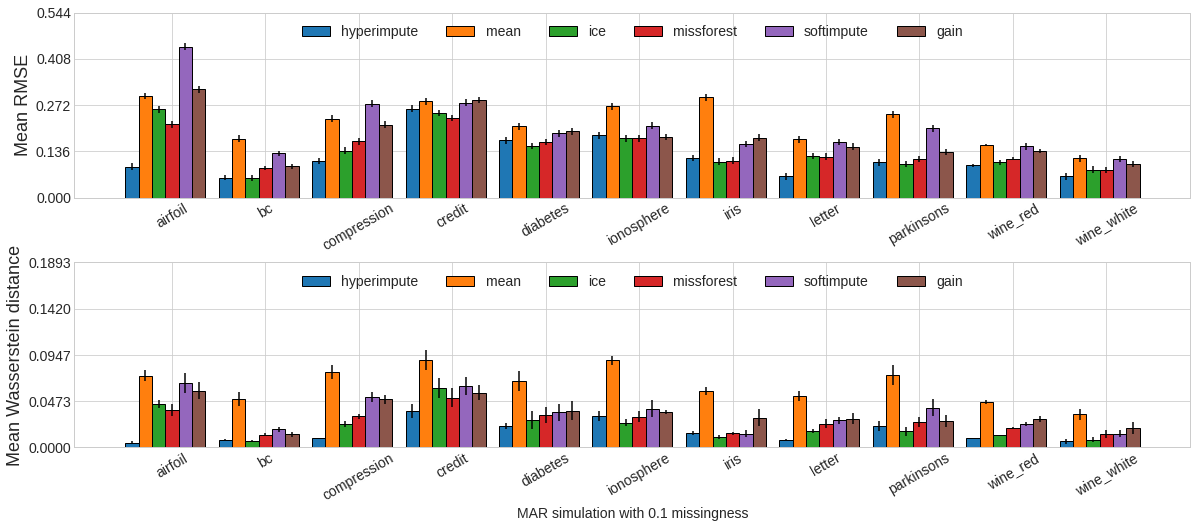

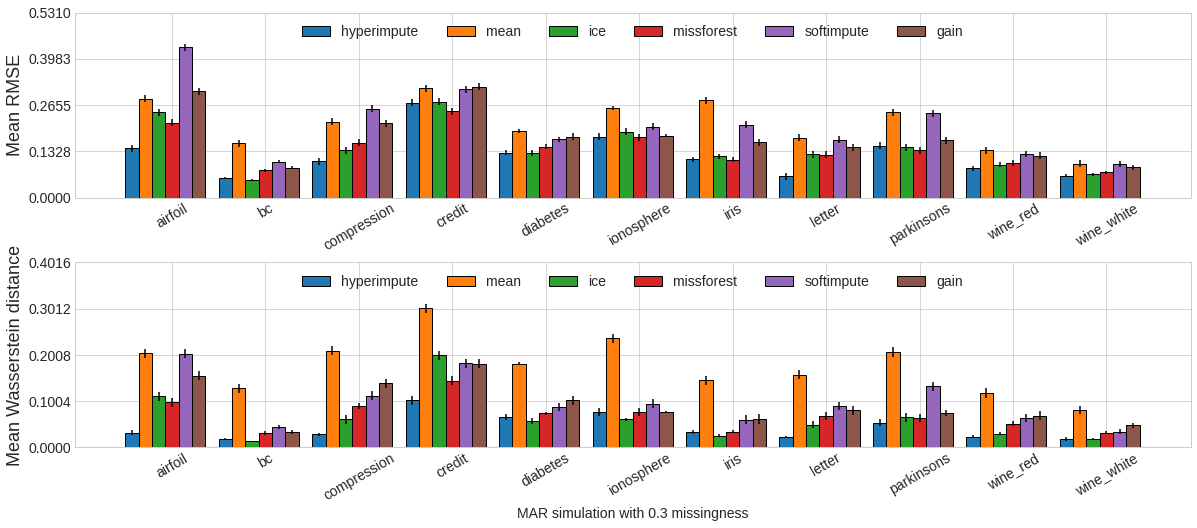

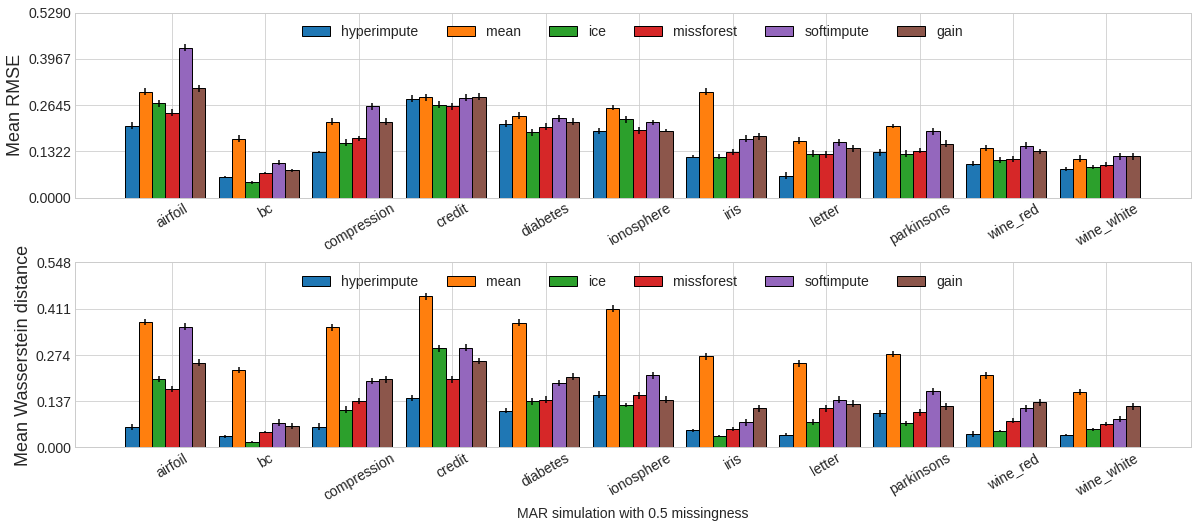

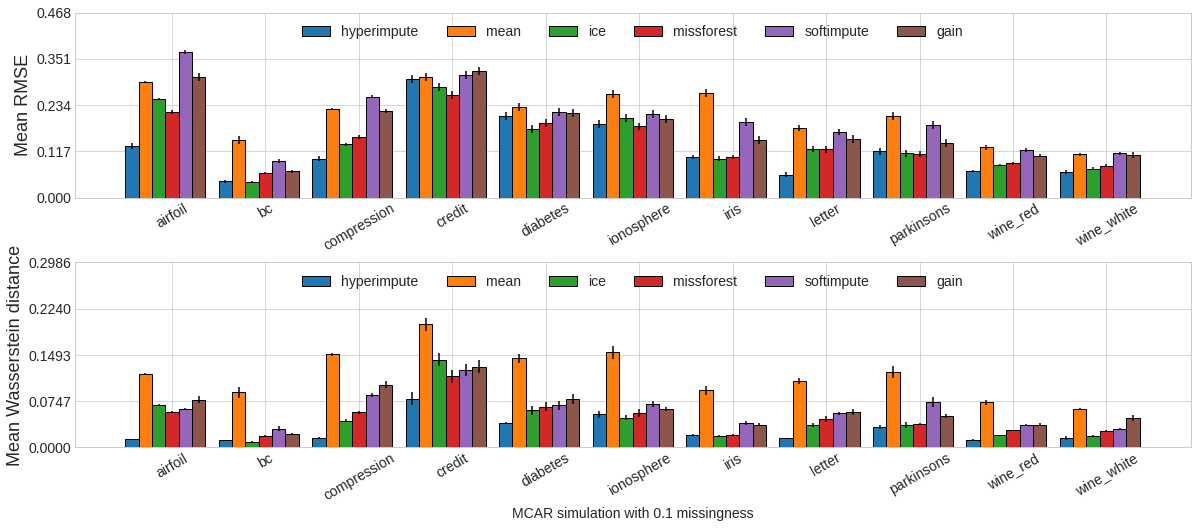

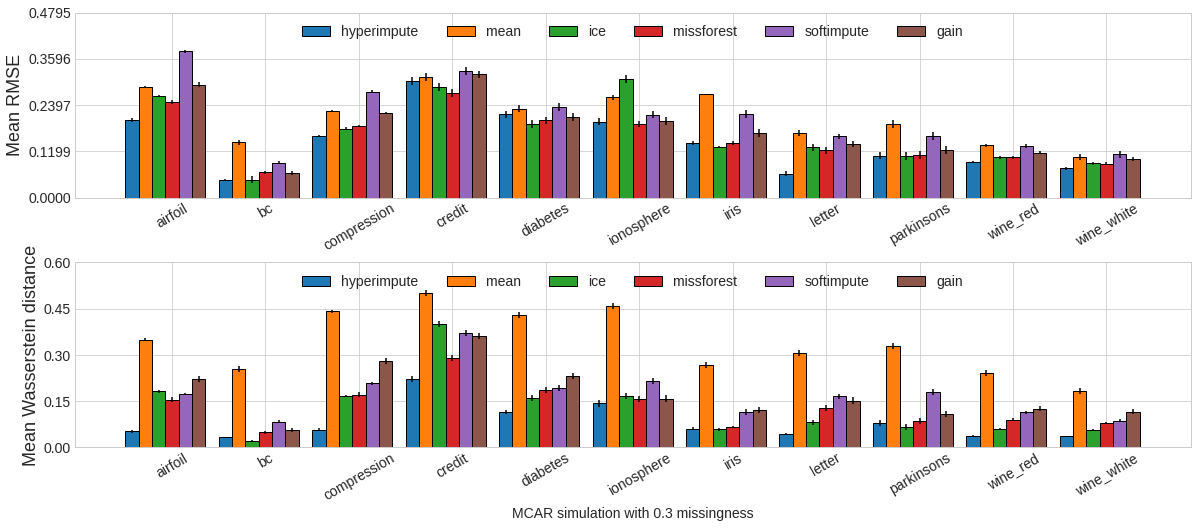

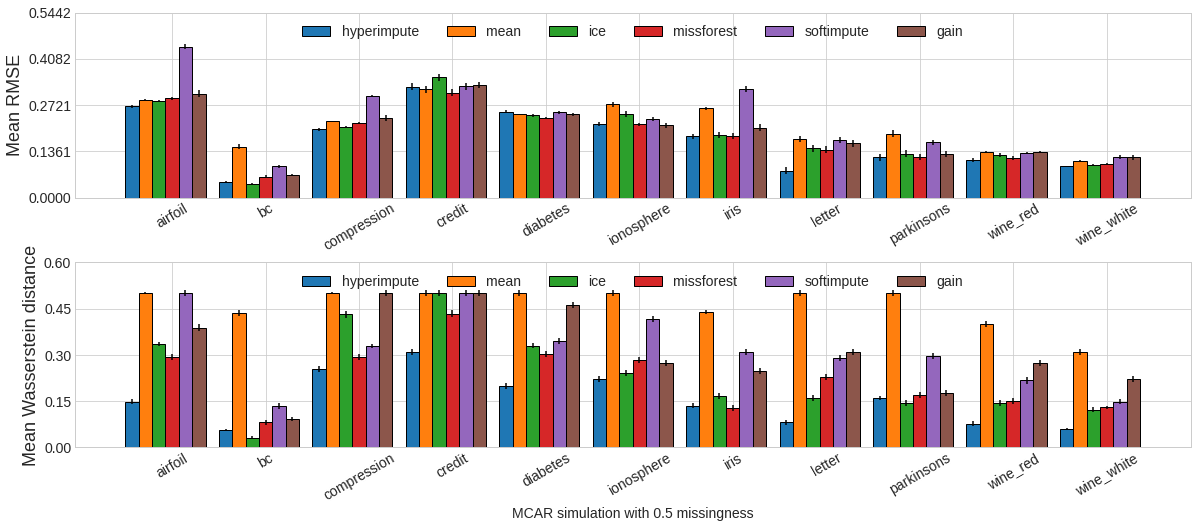

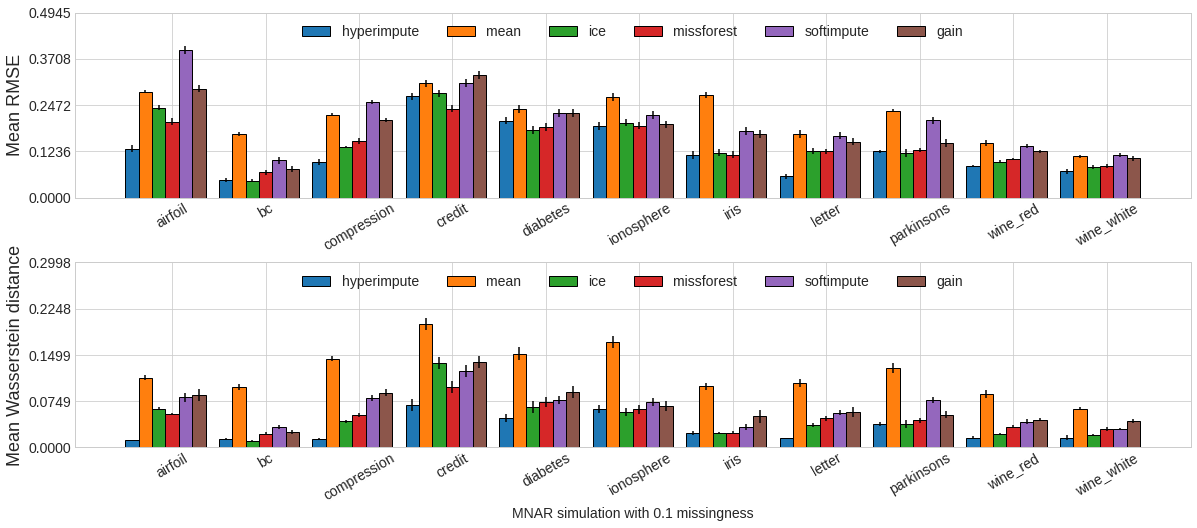

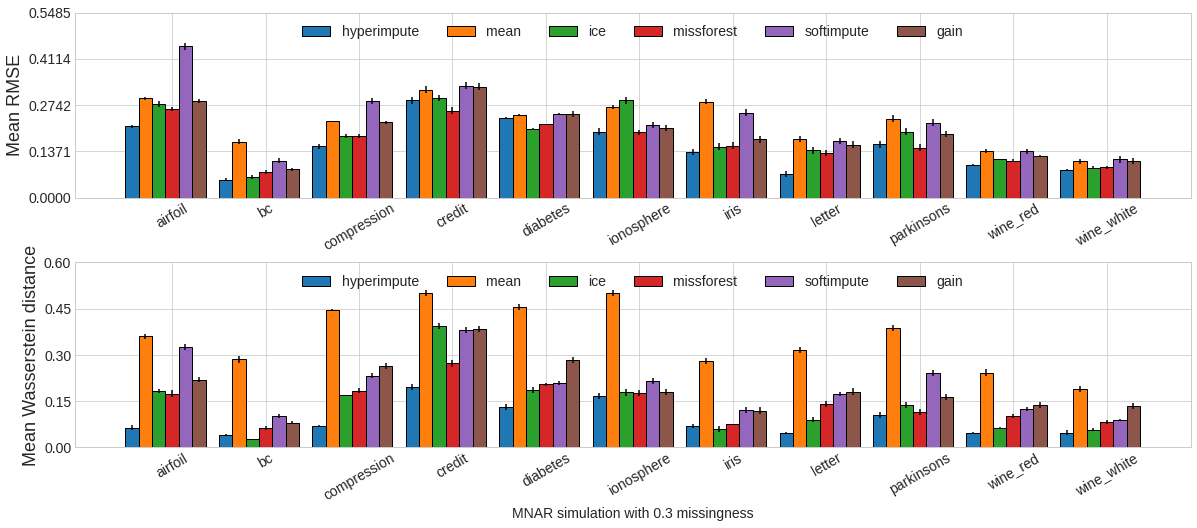

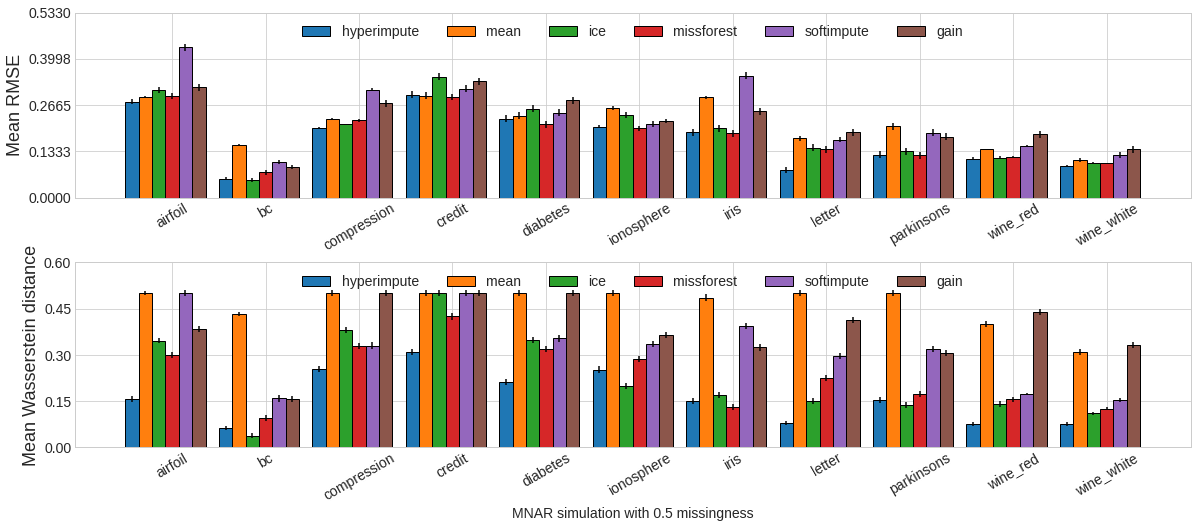

In [5]:
import matplotlib.pyplot as plt

fontsize = 14
df_graph_len = models_cnt + 1


def generate_plot_for_ax(ax, scenario, miss, metric):
    offset = len(data)
    plt.setp(ax.get_yticklabels(), fontsize=fontsize)

    barWidth = 1

    max_val = 0
    idx = 0
    for model in results[scenario][miss][metric]:
        pos = [idx + df_graph_len * i * barWidth for i in range(offset)]

        if len(pos) == 0:
            continue

        mod_mean = results[scenario][miss][metric][model]["mean"]
        mod_std = results[scenario][miss][metric][model]["std"]
        if max_val < max(mod_mean):
            max_val = max(mod_mean)

        ax.bar(
            pos,
            mod_mean,
            yerr=mod_std,
            width=barWidth,
            label=str(model),
            edgecolor="k",
        )
        idx += barWidth

    ax.legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1),
        ncol=models_cnt,
        prop={"size": fontsize},
    )

    ax.set_xticks(
        [df_graph_len * r + int(models_cnt / 2) for r in range(offset)],
        df_names,
        rotation=30,
        fontsize=fontsize,
    )
    ax.set_yticks(np.linspace(0, max_val + 0.1, num=5), fontsize=fontsize)
    ax.set_ylabel(metric, fontsize=fontsize + 4)

    return ax


def generate_plot(scenario, miss):
    plt.style.use("seaborn-whitegrid")

    offset = len(data)
    metrics = list(results[scenario][miss].keys())
    fig, axs = plt.subplots(len(metrics), figsize=(20, 8))

    for idx, metric in enumerate(metrics):
        generate_plot_for_ax(axs[idx], scenario, miss, metric)

    plt.xlabel(f"{scenario} simulation with {miss} missingness", fontsize=fontsize)
    plt.subplots_adjust(hspace=0.35)

    plt.savefig(output_dir / f"general_overview_{scenario}_{miss}.png")
    plt.show()


for scenario in ["MAR", "MCAR", "MNAR"]:
    for miss in [0.1, 0.3, 0.5]:
        generate_plot(scenario, miss)

## Plot by miss ratio

dataset  airfoil


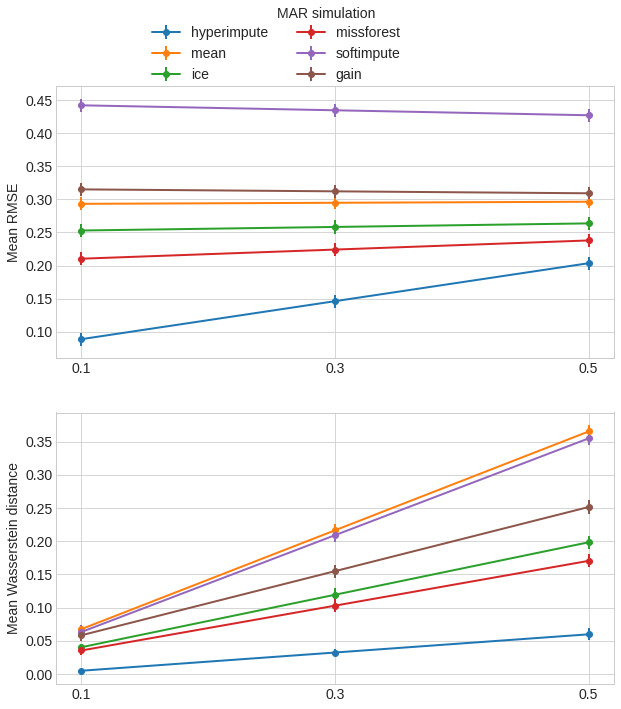

dataset  compression


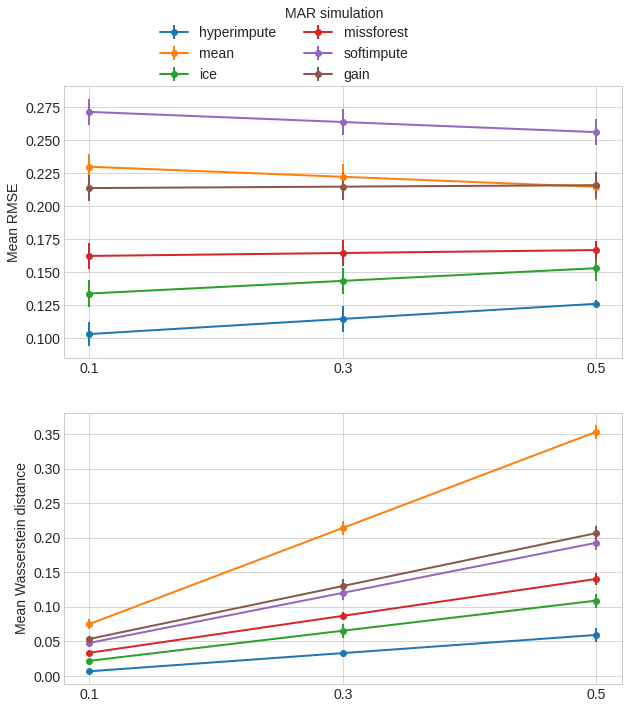

dataset  letter


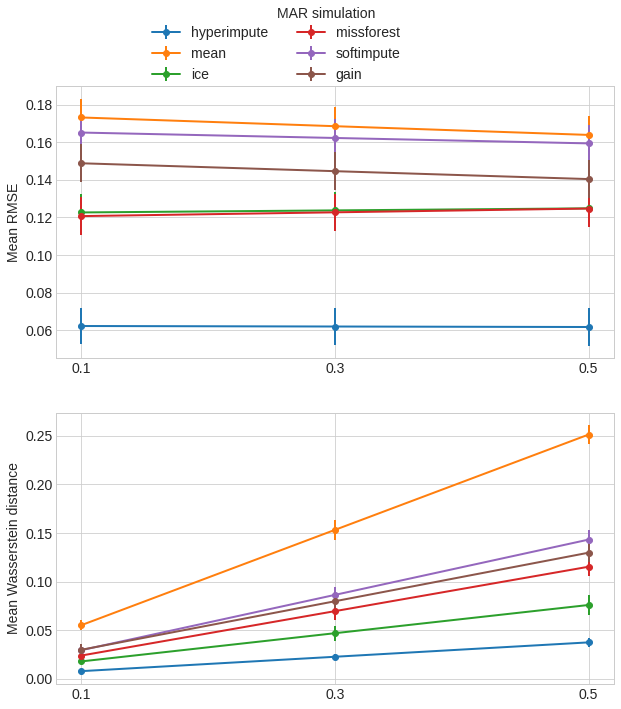

dataset  wine_red


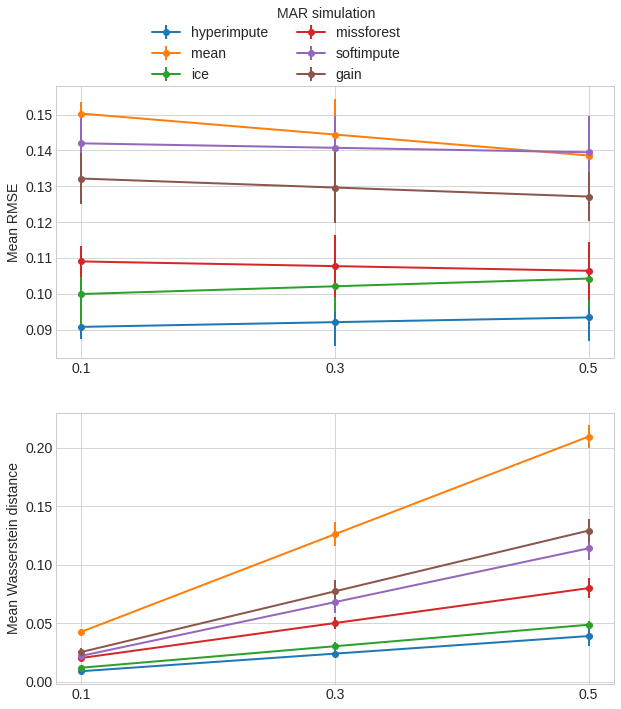

dataset  wine_white


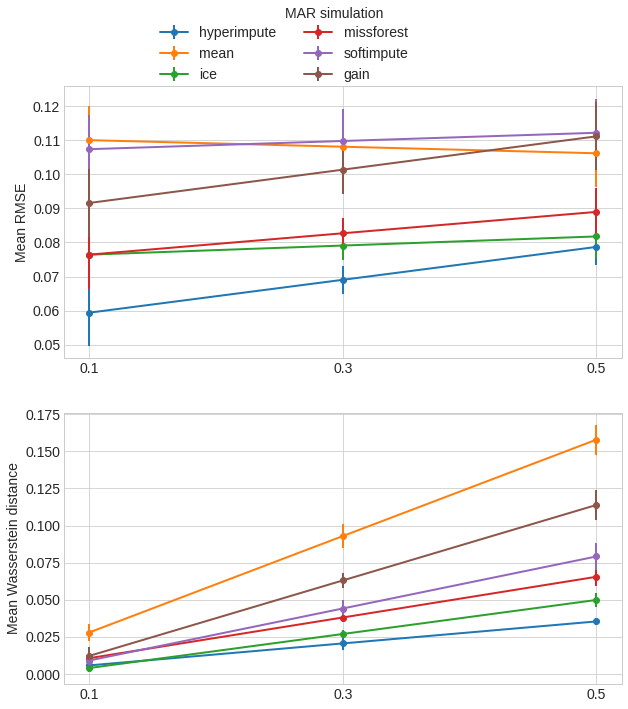

dataset  airfoil


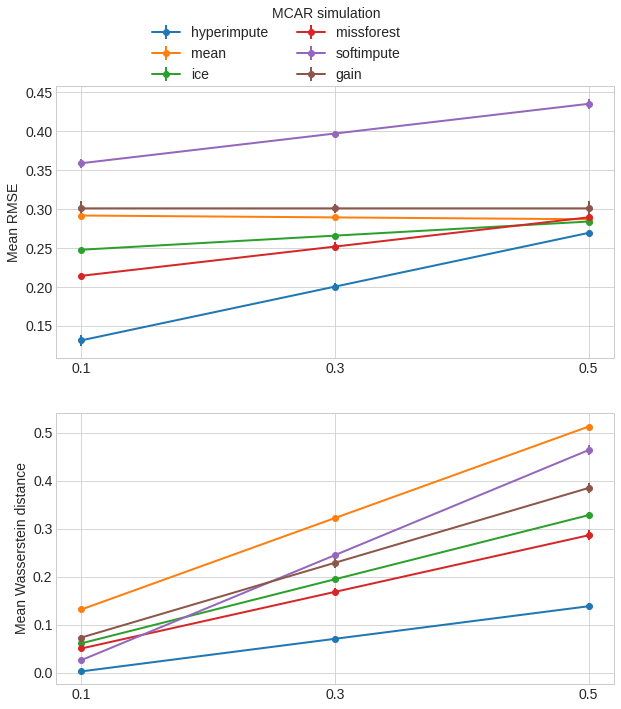

dataset  compression


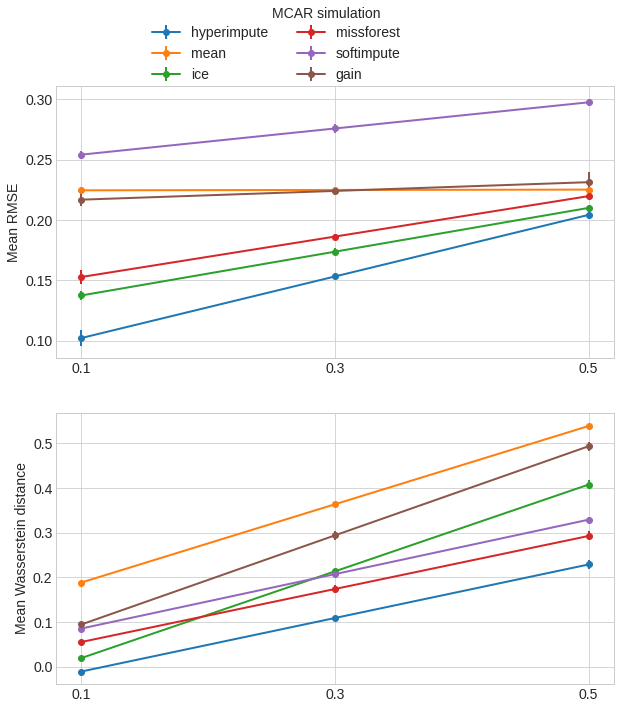

dataset  letter


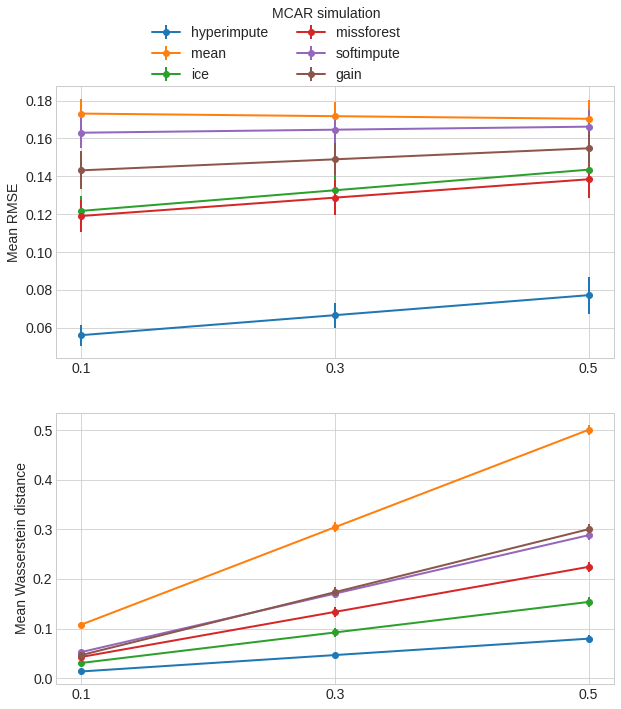

dataset  wine_red


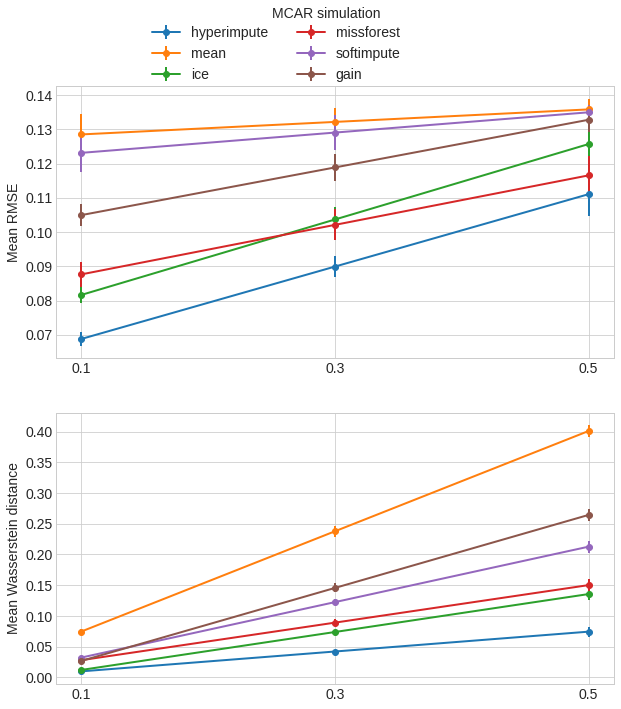

dataset  wine_white


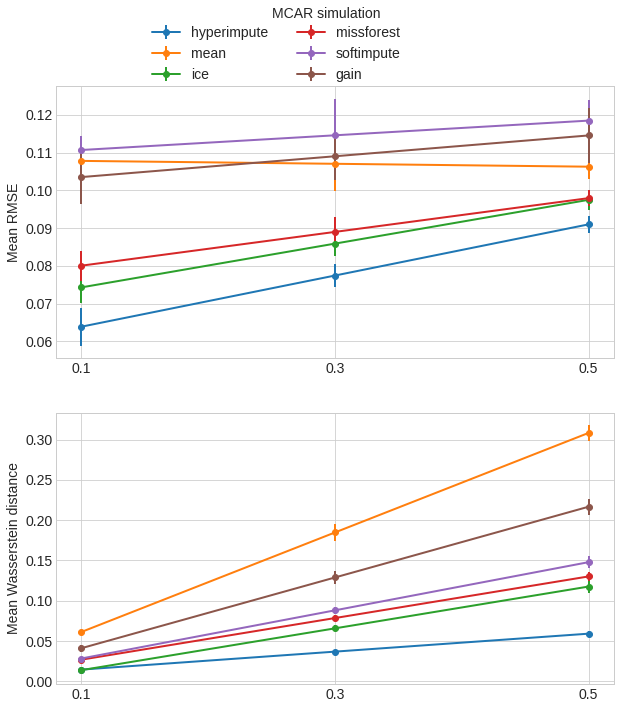

dataset  airfoil


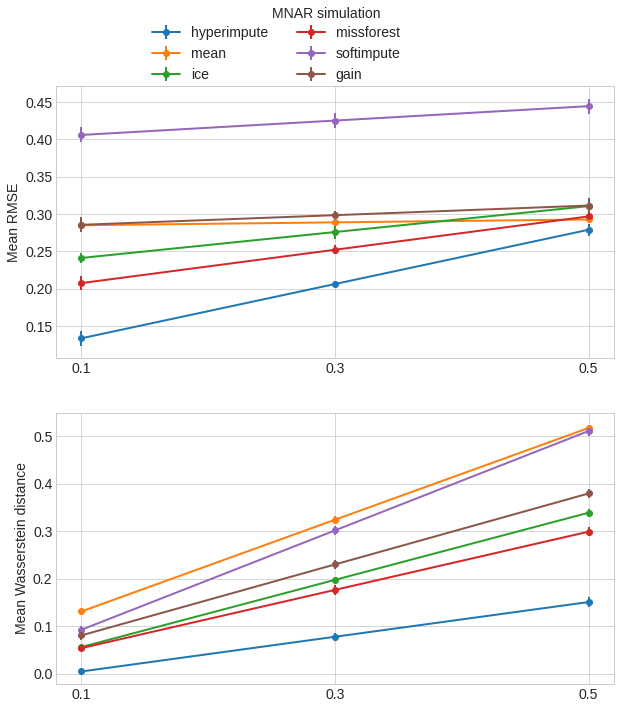

dataset  compression


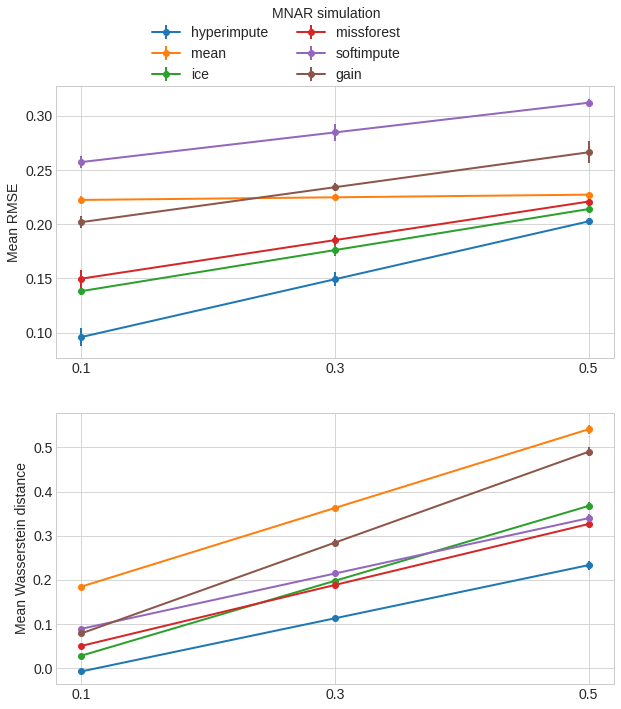

dataset  letter


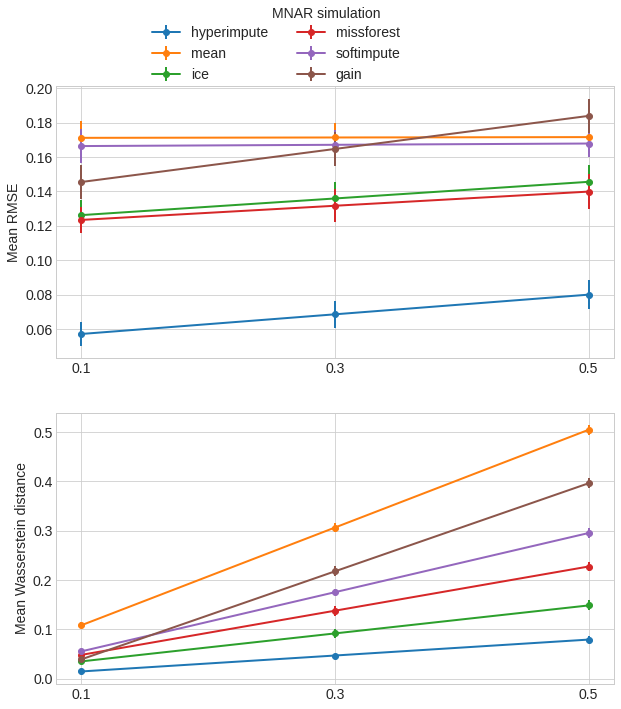

dataset  wine_red


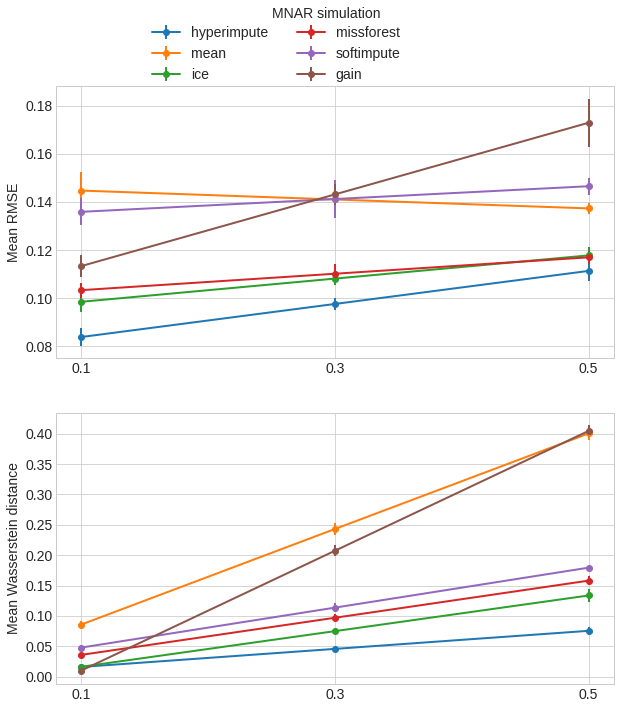

dataset  wine_white


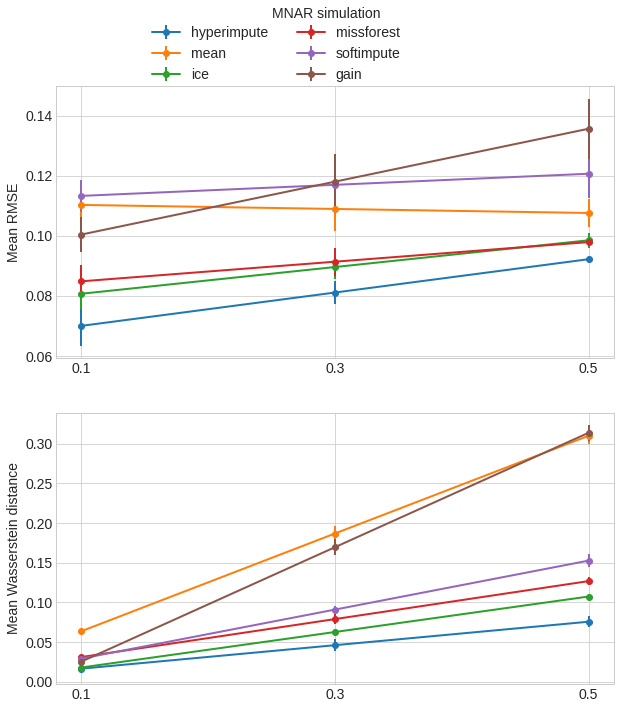

In [13]:
import numpy as np

x_axis = [0.1, 0.3, 0.5]

fontsize = 14


def generate_plot_for_ax(ax, scenario, metric, df_idx):
    offset = len(data)

    barWidth = 1

    max_val = 0
    idx = 0

    for model in results[scenario][0.1][metric]:

        datapoints = []
        datapoints_std = []

        for miss in results[scenario]:
            if metric not in results[scenario][miss]:
                continue

            local_res = results[scenario][miss][metric][model]["mean"][df_idx]
            local_res_std = results[scenario][miss][metric][model]["std"][df_idx]
            datapoints.append(local_res)
            datapoints_std.append(local_res_std)

        ax.errorbar(
            x_axis,
            smooth_line(datapoints),
            yerr=datapoints_std,
            label=str(model),
            linewidth=2,
            marker="o",
        )

    ax.set_xticks(x_axis, fontsize=fontsize)
    ax.set_ylabel(metric, fontsize=fontsize)
    ax.tick_params(axis="both", which="major", labelsize=fontsize)

    return ax


def generate_plot(scenario, df_idx, df_name):
    plt.style.use("seaborn-whitegrid")

    offset = len(data)

    metrics = list(results[scenario][0.1].keys())
    fig, axs = plt.subplots(len(metrics), figsize=(10, 11))

    for idx, metric in enumerate(metrics):
        generate_plot_for_ax(axs[idx], scenario, metric, df_idx)

    axs[0].legend(
        loc="upper left",
        bbox_to_anchor=(0.15, 1.27),
        ncol=int(models_cnt / 3),
        prop={"size": fontsize},
    )
    fig.suptitle(f"{scenario} simulation", fontsize=fontsize)
    plt.savefig(output_dir / f"error_by_miss_{scenario}_{df_name}.png")

    plt.show()


plot_df = ["airfoil", "compression", "letter", "wine_white", "wine_red"]
for scenario in ["MAR", "MCAR", "MNAR"]:
    for idx, df_name in enumerate(df_names):
        if df_name not in plot_df:
            continue
        print("dataset ", df_name)
        generate_plot(scenario, idx, df_name)